In [8]:
%run imports_N_loadDenoised.ipynb

/c/Users/junec/AppData/Local/Programs/Python/Python38/python
load & denoise real field data===========================
---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(pressure_measure_denoised) 29813
len(ground_truth_denoised) 60
after remove uncorrect ground truth
len(ground_truth_denoised) 54


In [14]:
end_time=list(rate_df["Elapsed time"])[-1]
end_time

4075.570422500168

In [15]:
rate_file="../data_input/Processed_Rate.txt"
rate_df_processed = pd.read_csv(rate_file, delimiter="\t",skiprows=2, names=["Elapsed time(hr)", "Liquid rate(STB/D)"],skipinitialspace = True)
rate_df_processed

Elapsed time(hr)  Liquid rate(STB/D)
0            0.429719             -3916.6
1           11.763000             -4496.1
2           14.179700             -8631.8
3           21.846400             -9375.3
4           26.013100            -11757.6
..                ...                 ...
245      10716.200000             -5785.3
246      10740.500000             -8866.1
247      10763.700000            -10355.7
248      10767.200000            -12500.2
249      10799.000000            -15584.7

[250 rows x 2 columns]

In [16]:
sub_rate_df_processed=rate_df_processed.loc[rate_df_processed["Elapsed time(hr)"]  <= end_time]
sub_rate_df_processed


Elapsed time(hr)  Liquid rate(STB/D)
0            0.429719            -3916.60
1           11.763000            -4496.10
2           14.179700            -8631.80
3           21.846400            -9375.30
4           26.013100           -11757.60
..                ...                 ...
164       3882.640000                0.00
165       3883.190000            -6906.53
166       3890.020000           -12695.00
167       3894.860000           -14218.30
168       3904.940000           -16287.50

[169 rows x 2 columns]

In [32]:
sub_rate_df_zero=rate_df_processed.loc[rate_df_processed["Liquid rate(STB/D)"]  ==0]
len(sub_rate_df_zero)
sub_rate_df_zero

Elapsed time(hr)  Liquid rate(STB/D)
9             405.447                 0.0
15            527.163                 0.0
22            582.550                 0.0
26            684.633                 0.0
30            845.015                 0.0
38            965.982                 0.0
46           1229.430                 0.0
54           1288.690                 0.0
60           1418.270                 0.0
69           1495.410                 0.0
77           1538.820                 0.0
82           1865.880                 0.0
86           1951.220                 0.0
93           2084.620                 0.0
99           2145.500                 0.0
106          2381.500                 0.0
115          2529.050                 0.0
119          2559.320                 0.0
124          2689.220                 0.0
129          2787.810                 0.0
144          3273.120                 0.0
153          3706.040                 0.0
156          3796.740                 0.0
159          3837.710                 0.0
164          3882.640                 0.0
182          4566.250                 0.0
186          4854.250                 0.0
190          5383.720                 0.0
196          5430.820                 0.0
201          6031.620                 0.0
209          6156.260                 0.0
221          6538.050                 0.0
223          6570.740                 0.0
231          6870.710                 0.0
235          7209.170                 0.0
239          7487.910                 0.0
242         10649.700                 0.0

In [18]:
pressure_df

Elapsed time         Data  first_order_derivative  \
0          0.000000  2989.186167                5.644146   
1          0.495833  2991.984723              132.115152   
2          0.516667  2994.737122               92.798586   
3          0.545833  2997.443747              127.739264   
4          0.566667  3000.104982               78.486819   
...             ...          ...                     ...   
29808   4063.495571  7940.565392                0.229772   
29809   4065.499737  7941.025894                0.226872   
29810   4067.503904  7941.480584                0.223926   
29811   4069.508071  7941.929369                0.307136   
29812   4070.949737  7942.372157                0.307136   

       second_order_derivative  
0                   255.067575  
1                 -1887.195136  
2                  1197.966129  
3                 -2364.117282  
4                   290.472694  
...                        ...  
29808                -0.001447  
29809                -0.001470  
29810                 0.041518  
29811                 0.000000  
29812                 0.000000  

[29813 rows x 4 columns]

In [17]:
time_breakpoint=sub_rate_df_processed.iloc[0]["Elapsed time(hr)"]
time_breakpoint

0.429719

In [27]:
breakPoints_grountTruth=[]
for i in range(len(sub_rate_df_processed)):
    time_breakpoint=sub_rate_df_processed.iloc[i]["Elapsed time(hr)"]
    timeinterval=list(abs(pressure_df["Elapsed time"]-time_breakpoint))
    point_index=timeinterval.index(min(timeinterval))
    breakPoints_grountTruth.append(point_index)
breakPoints_grountTruth
len(breakPoints_grountTruth)

169

In [33]:
breakPoints_zeroRate=[]
for i in range(len(sub_rate_df_zero)):
    time_breakpoint=sub_rate_df_zero.iloc[i]["Elapsed time(hr)"]
    timeinterval=list(abs(pressure_df["Elapsed time"]-time_breakpoint))
    point_index=timeinterval.index(min(timeinterval))
    breakPoints_zeroRate.append(point_index)
breakPoints_zeroRate
len(breakPoints_zeroRate)

37

In [29]:
toDetect=CurveParametersCalc()
points=breakPoints_grountTruth
buildUp_groundTruth,drawDown_groundTruth=toDetect.detect_breakpoint_type(pressure_measure,
                               pressure_time,
                               points,
                                time_halfWindow=10,
                                min_pointsNumber=10
                              )
print(len(buildUp_groundTruth),len(drawDown_groundTruth))
buildUp_groundTruth=[point for point in breakPoints_grountTruth if point not in drawDown_groundTruth]
len(buildUp_groundTruth),len(drawDown_groundTruth)

detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
95 31


(138, 31)

<Figure size 1440x720 with 0 Axes>

'buildup:0, drawdown:37'
---initializing...
---plotting...


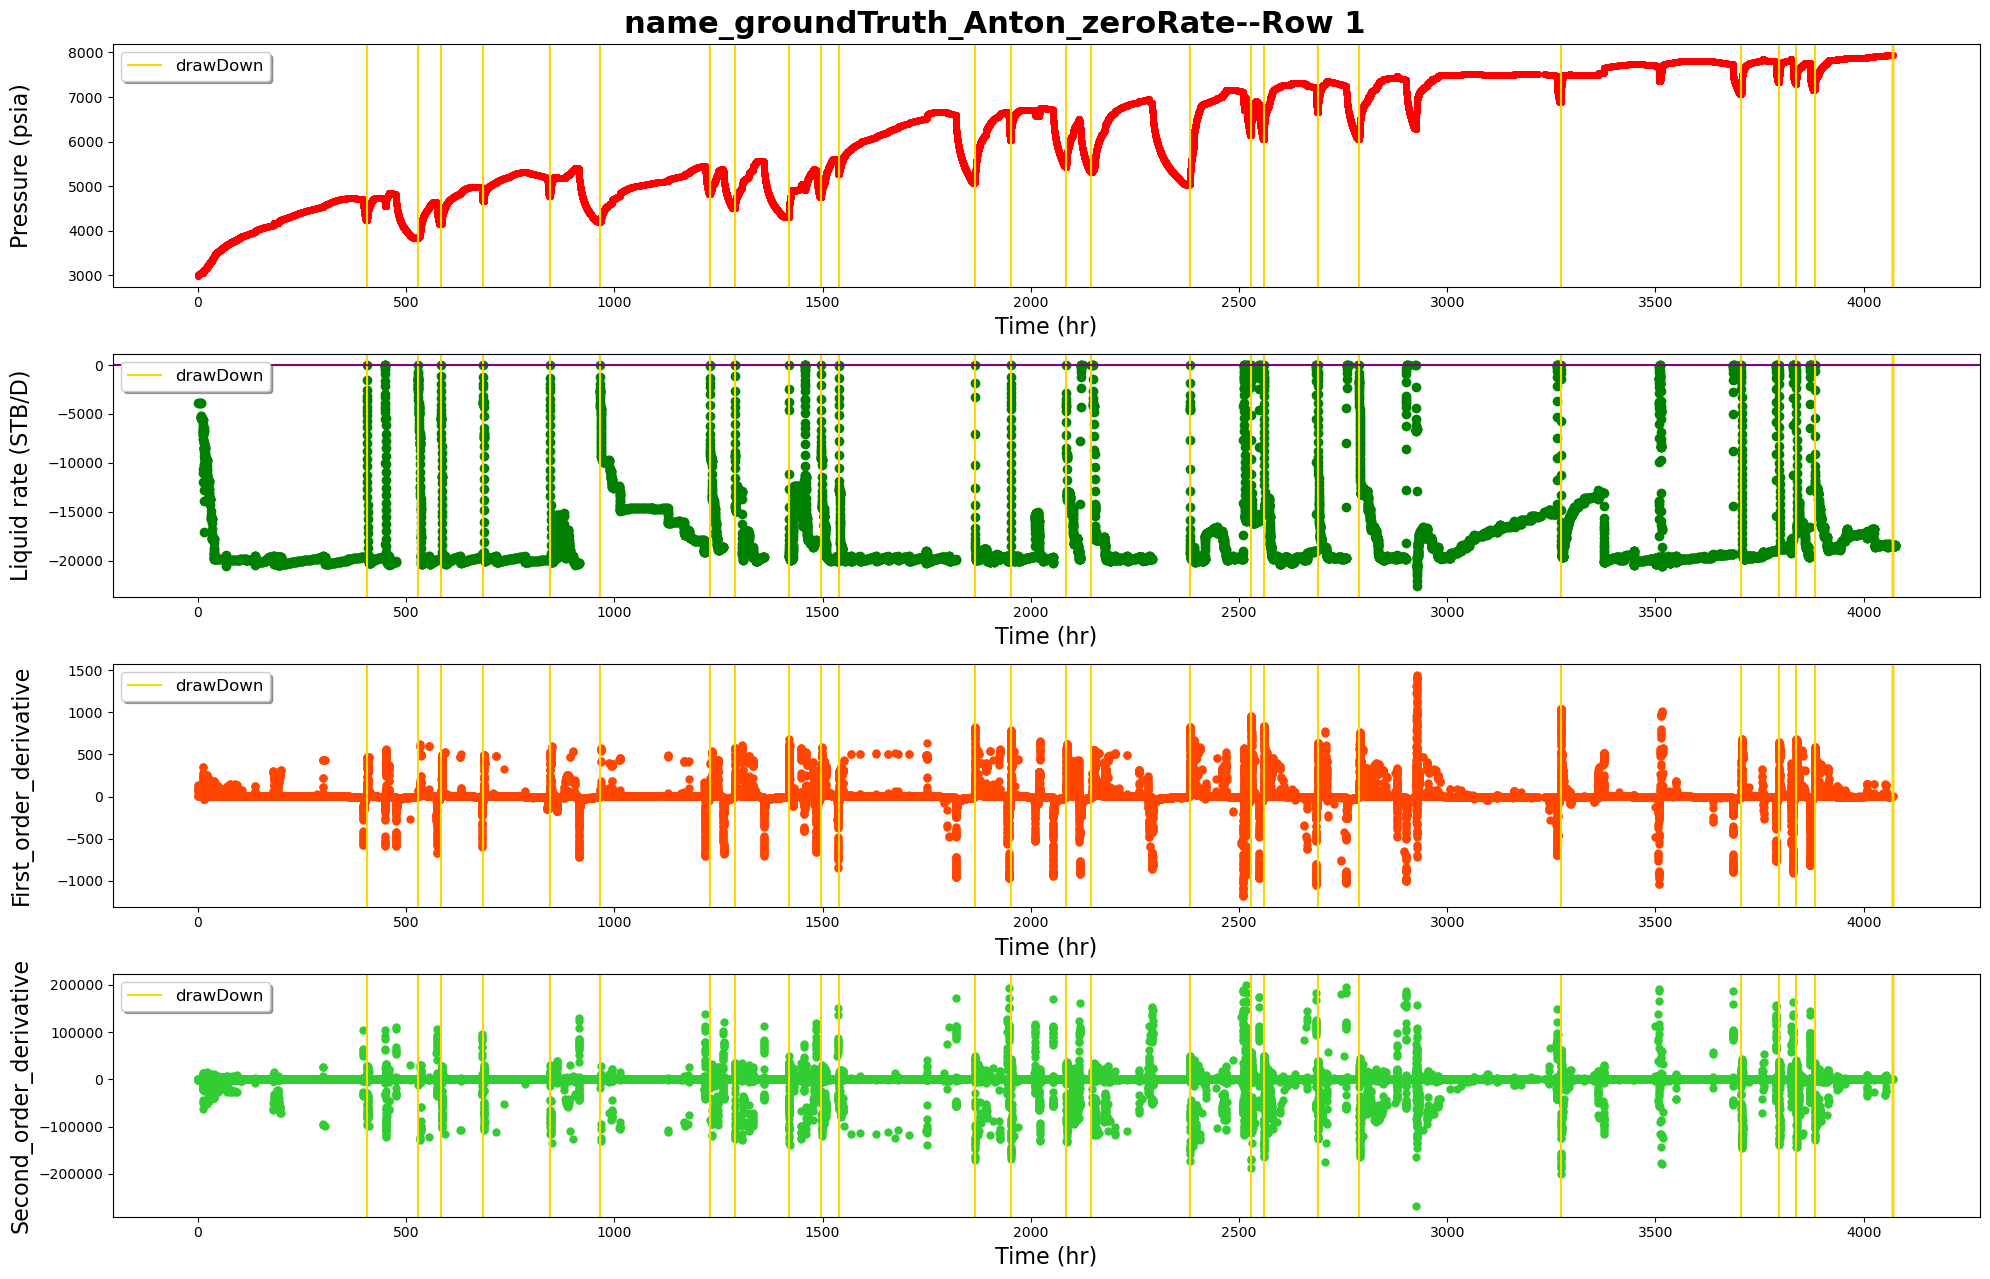

save whole....
detected 37 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[]


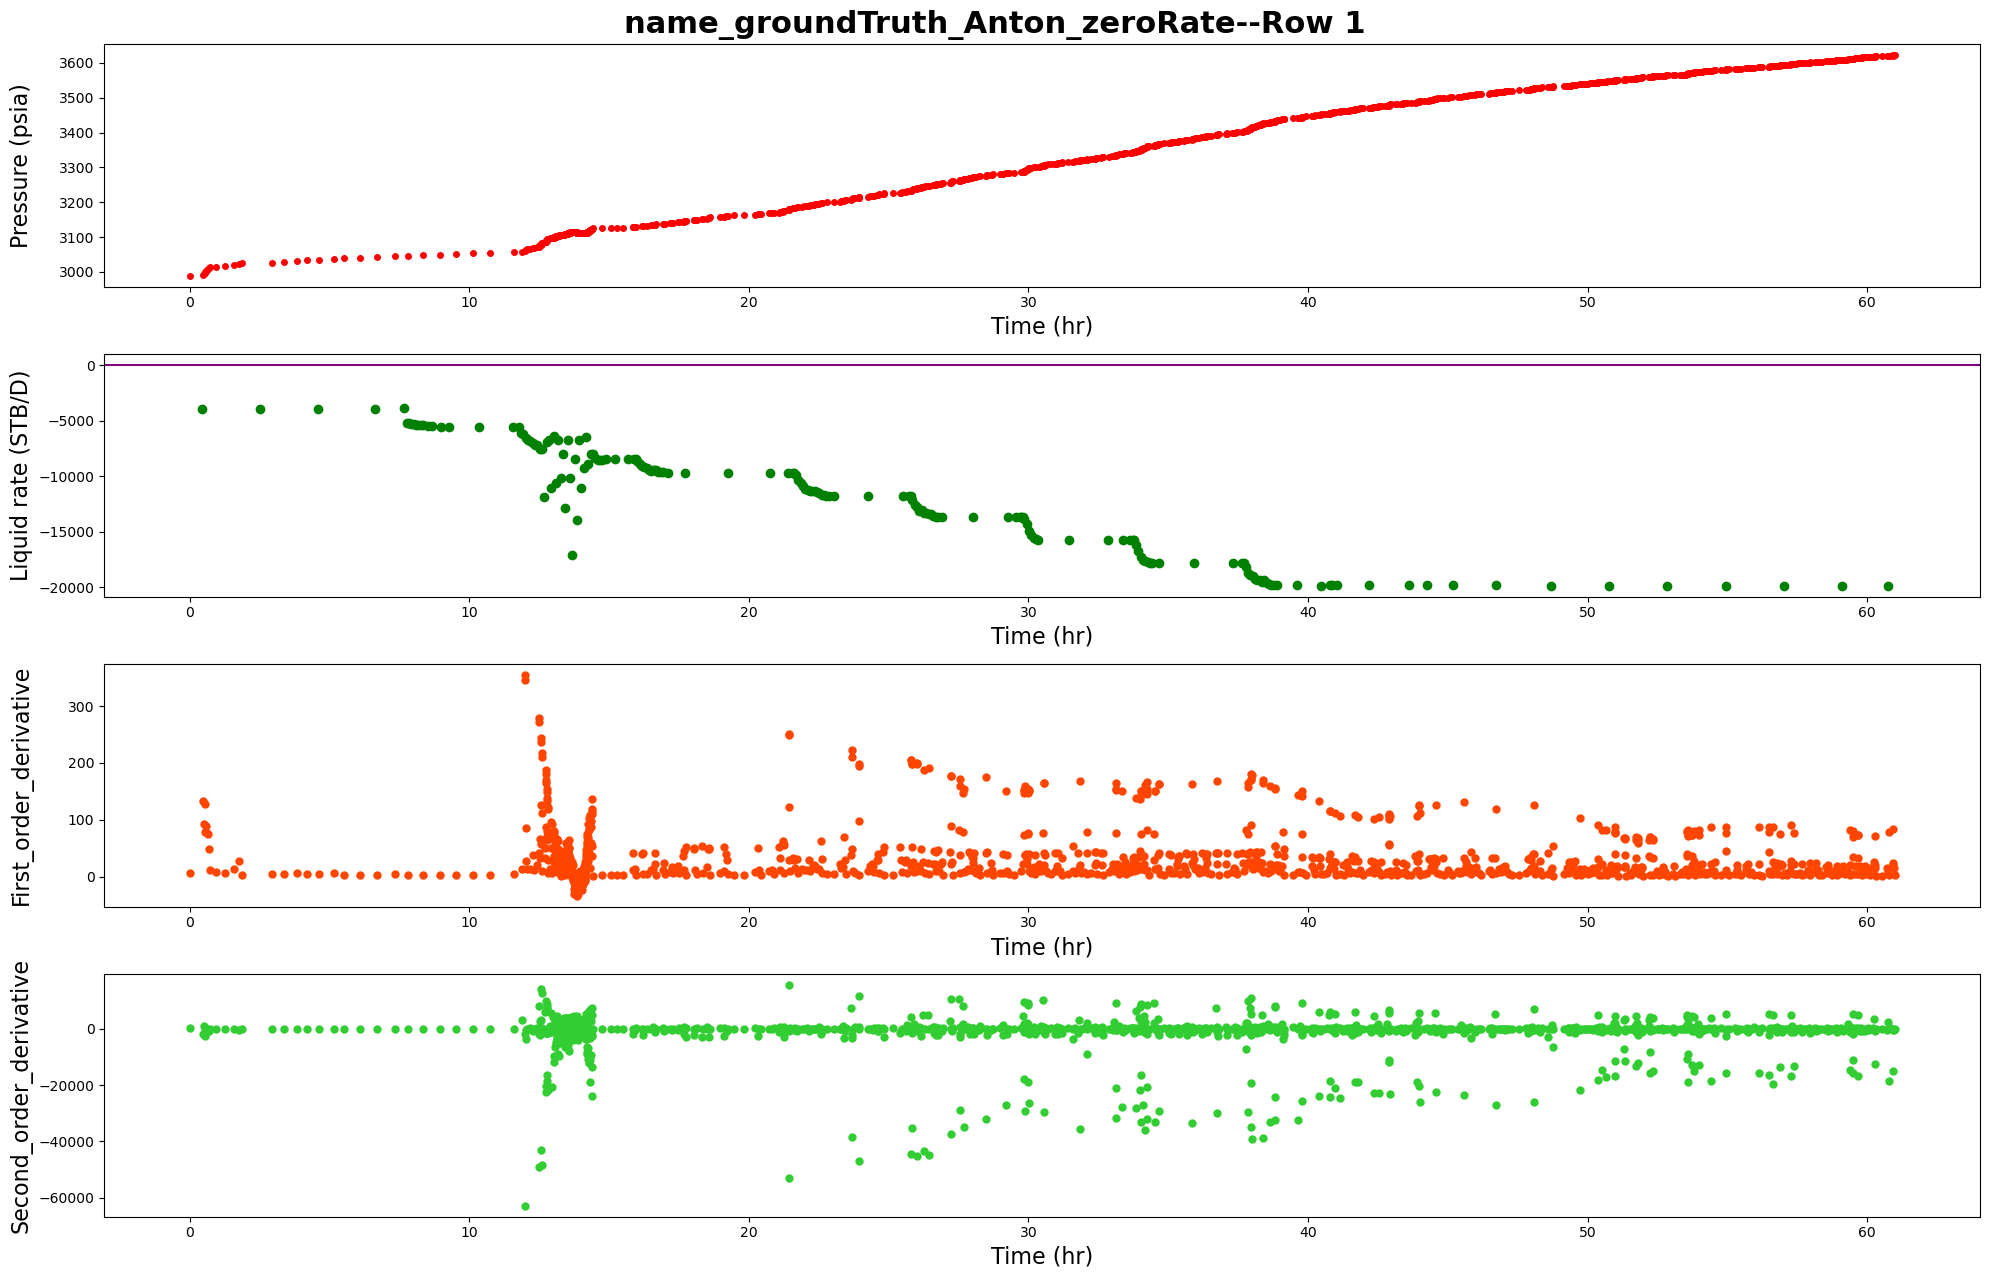

------row 2-----detected points:[]


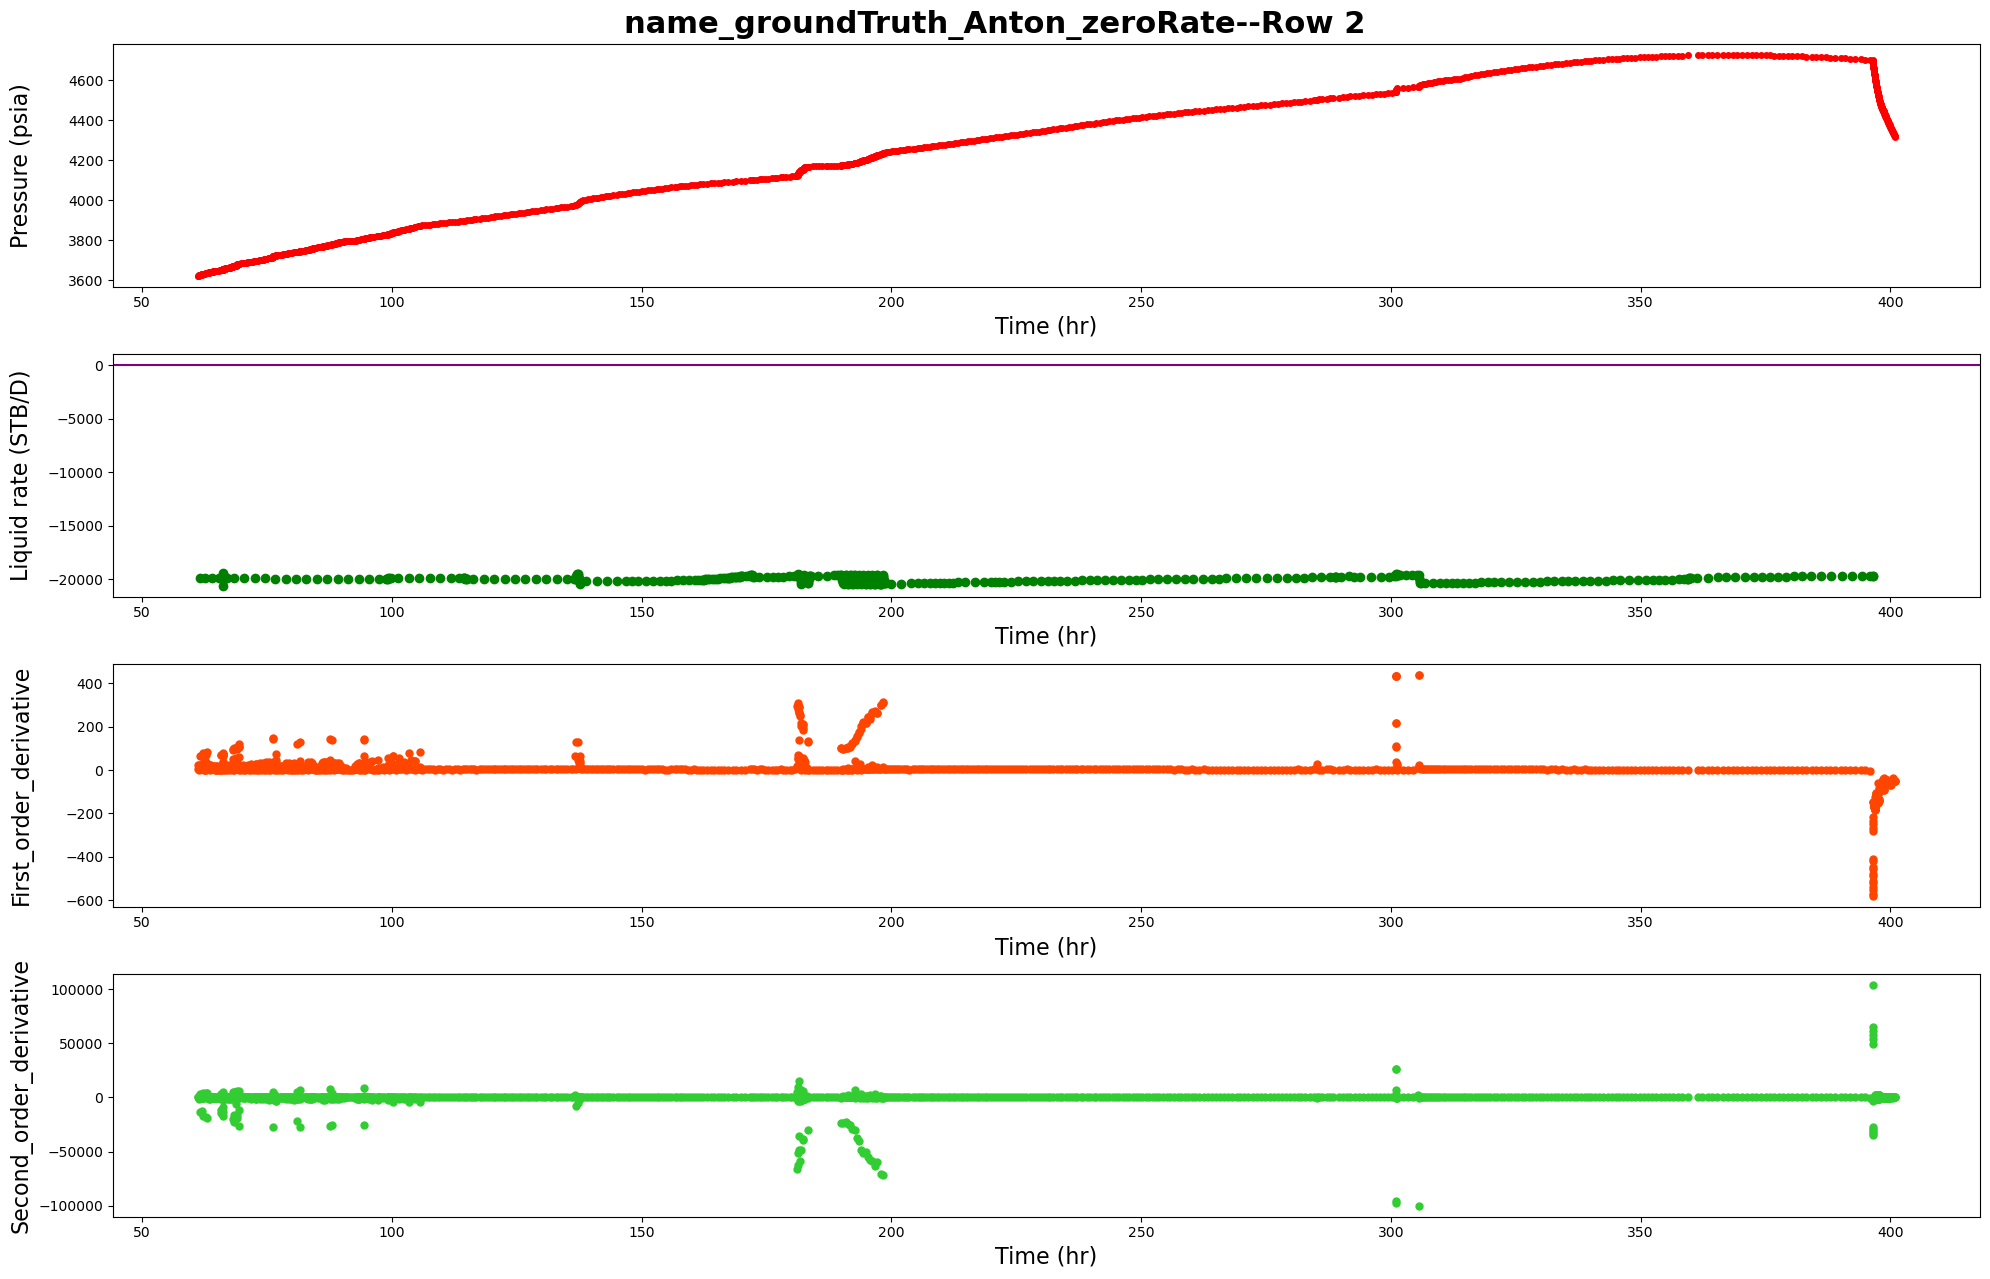

------row 3-----detected points:[2473, 3564]


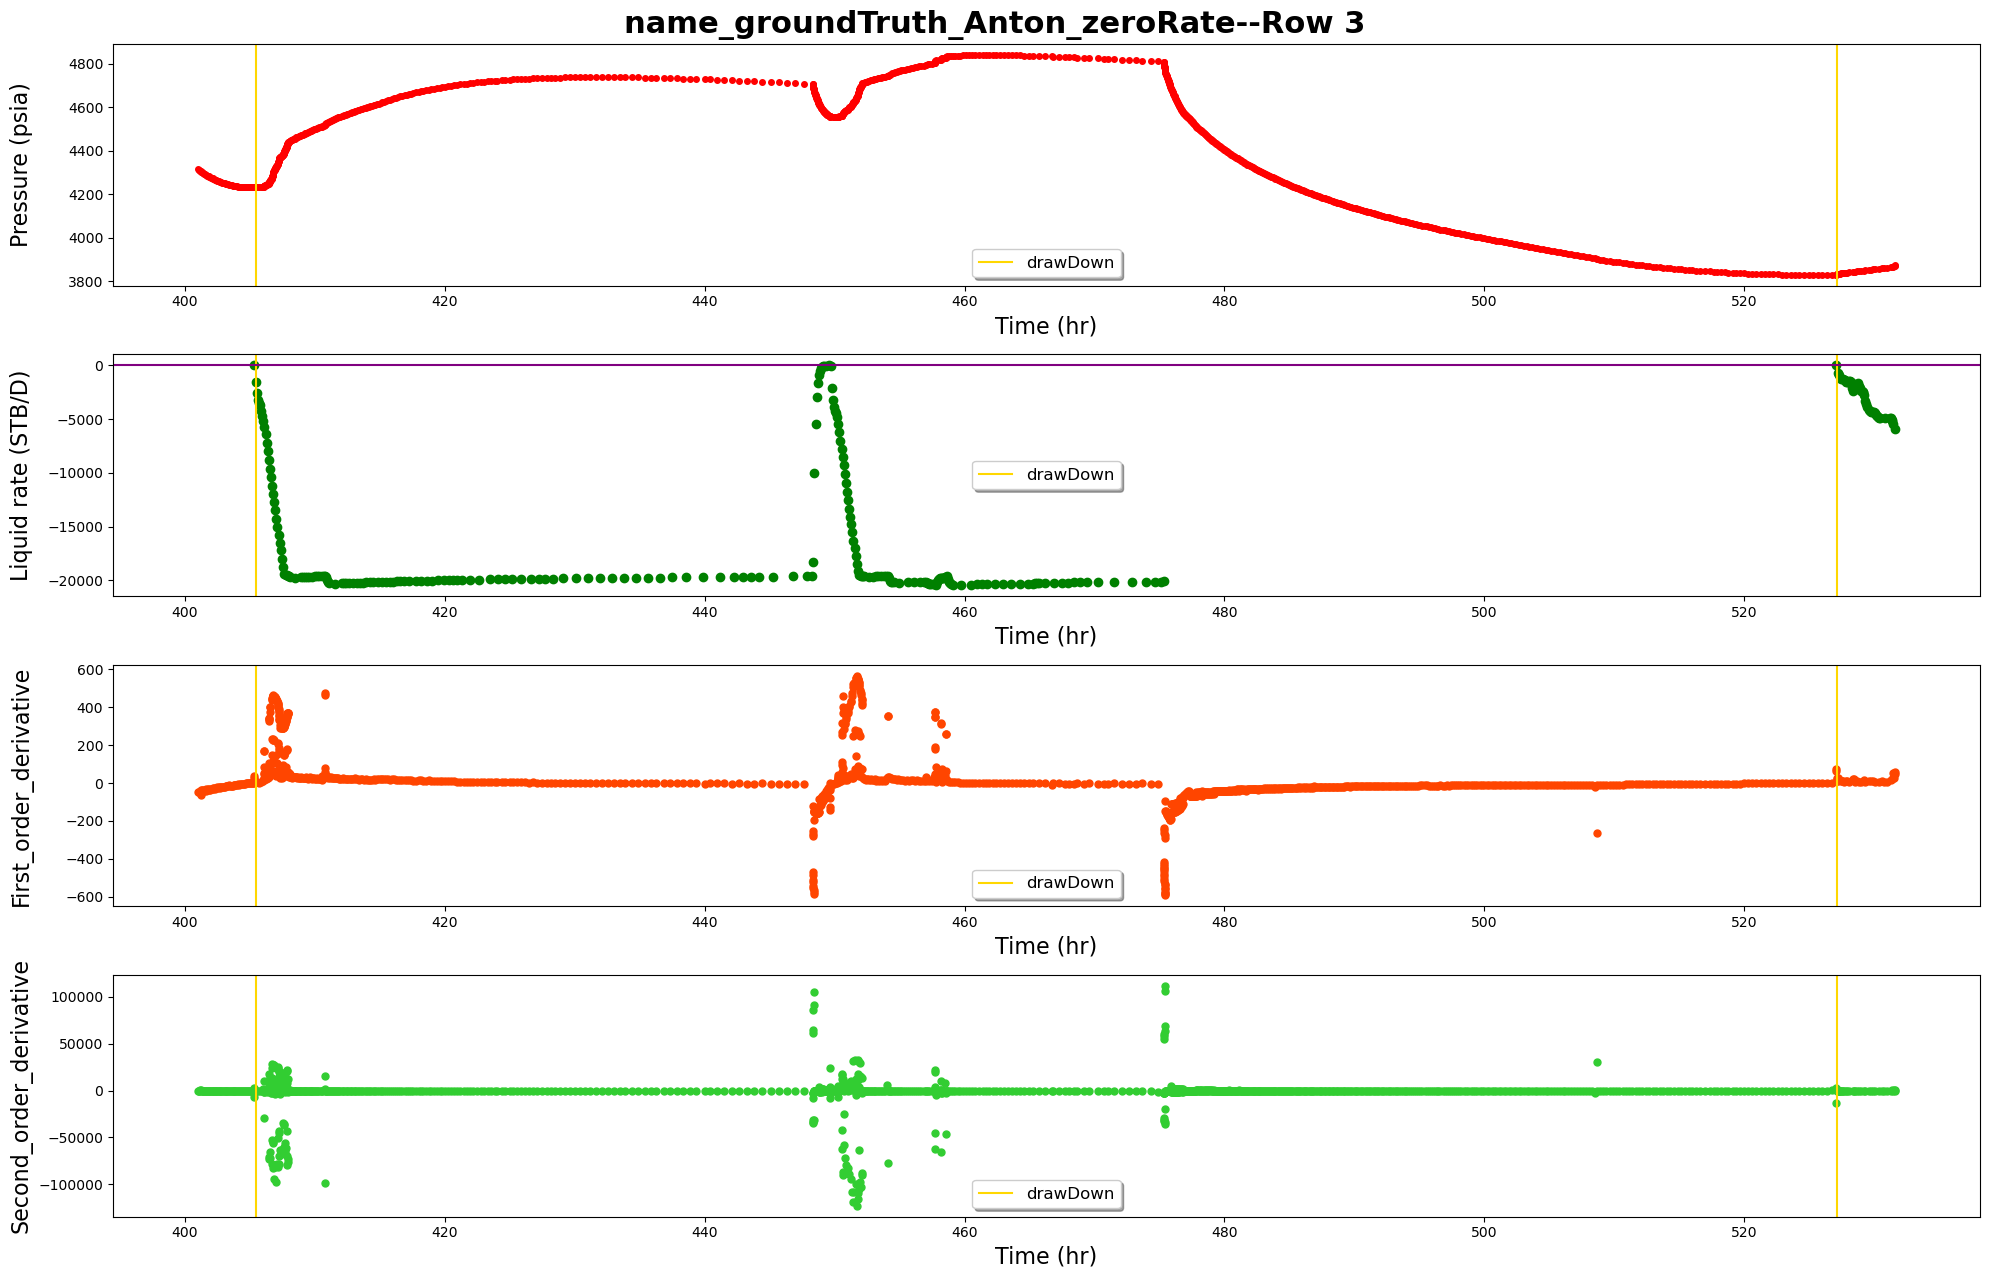

------row 4-----detected points:[4228]


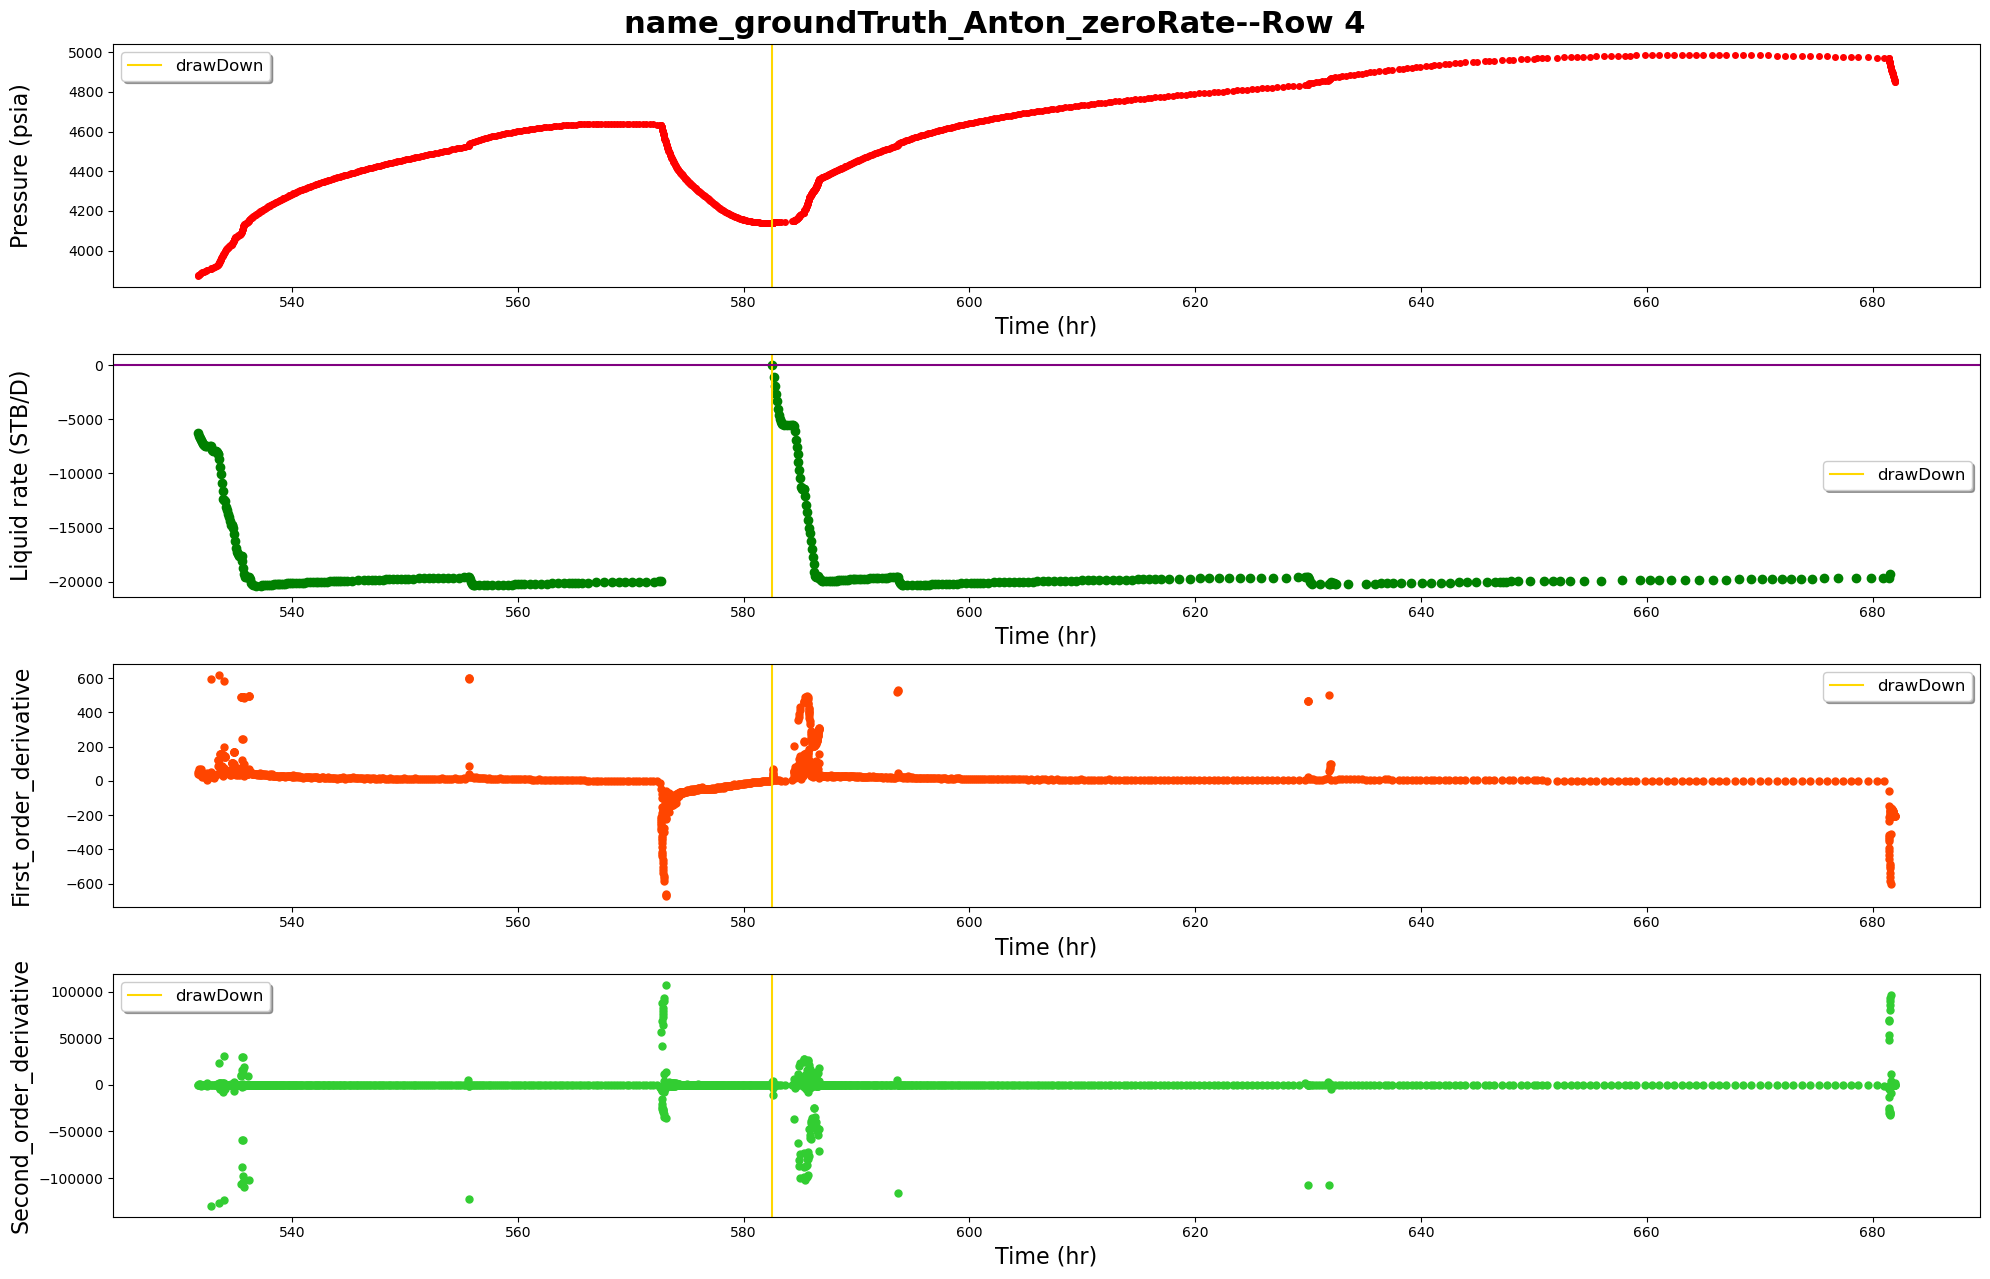

------row 5-----detected points:[4891, 5439]


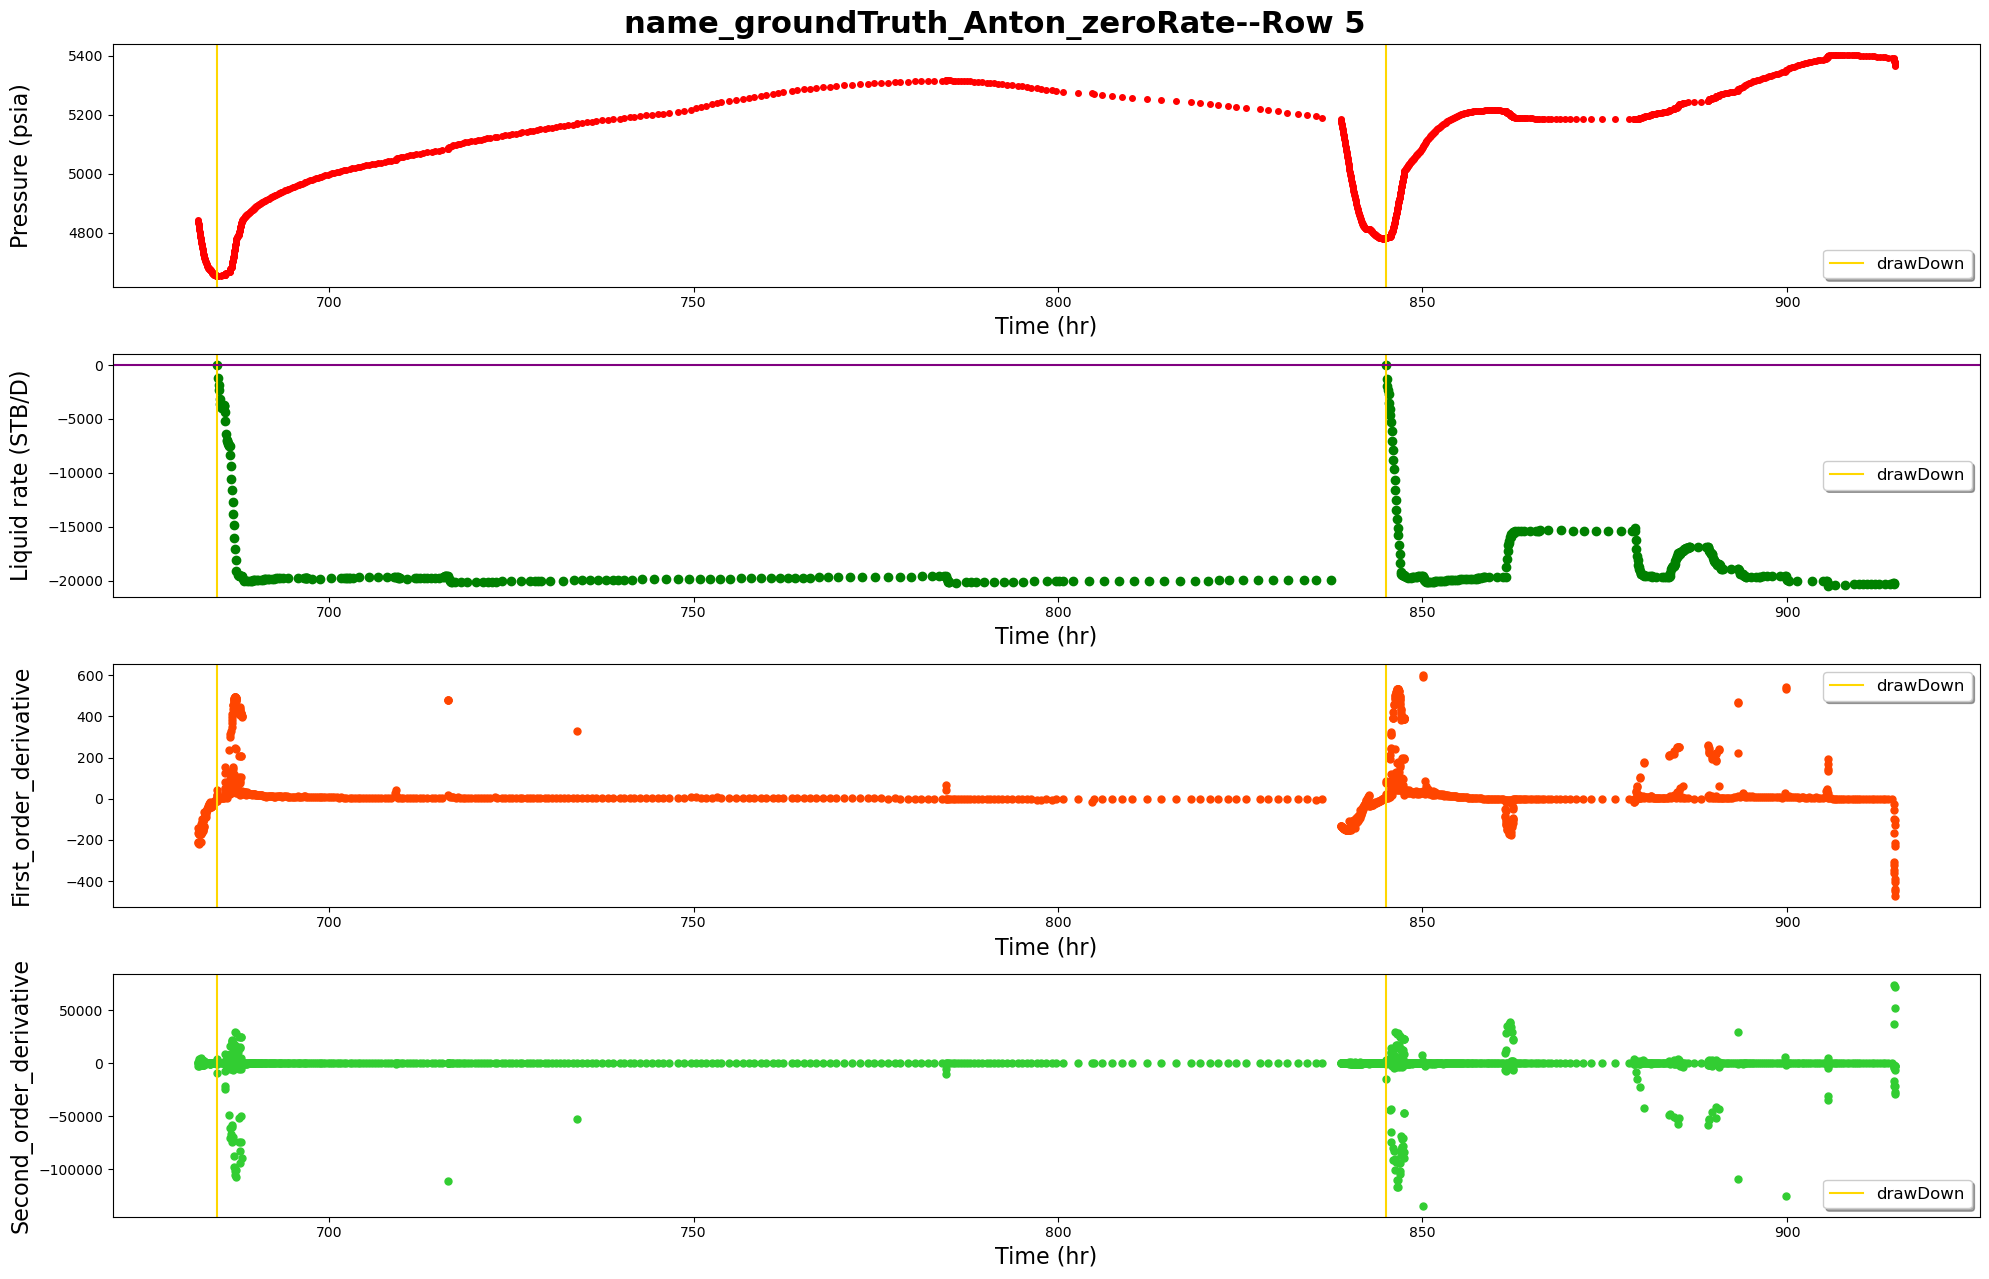

------row 6-----detected points:[6563]


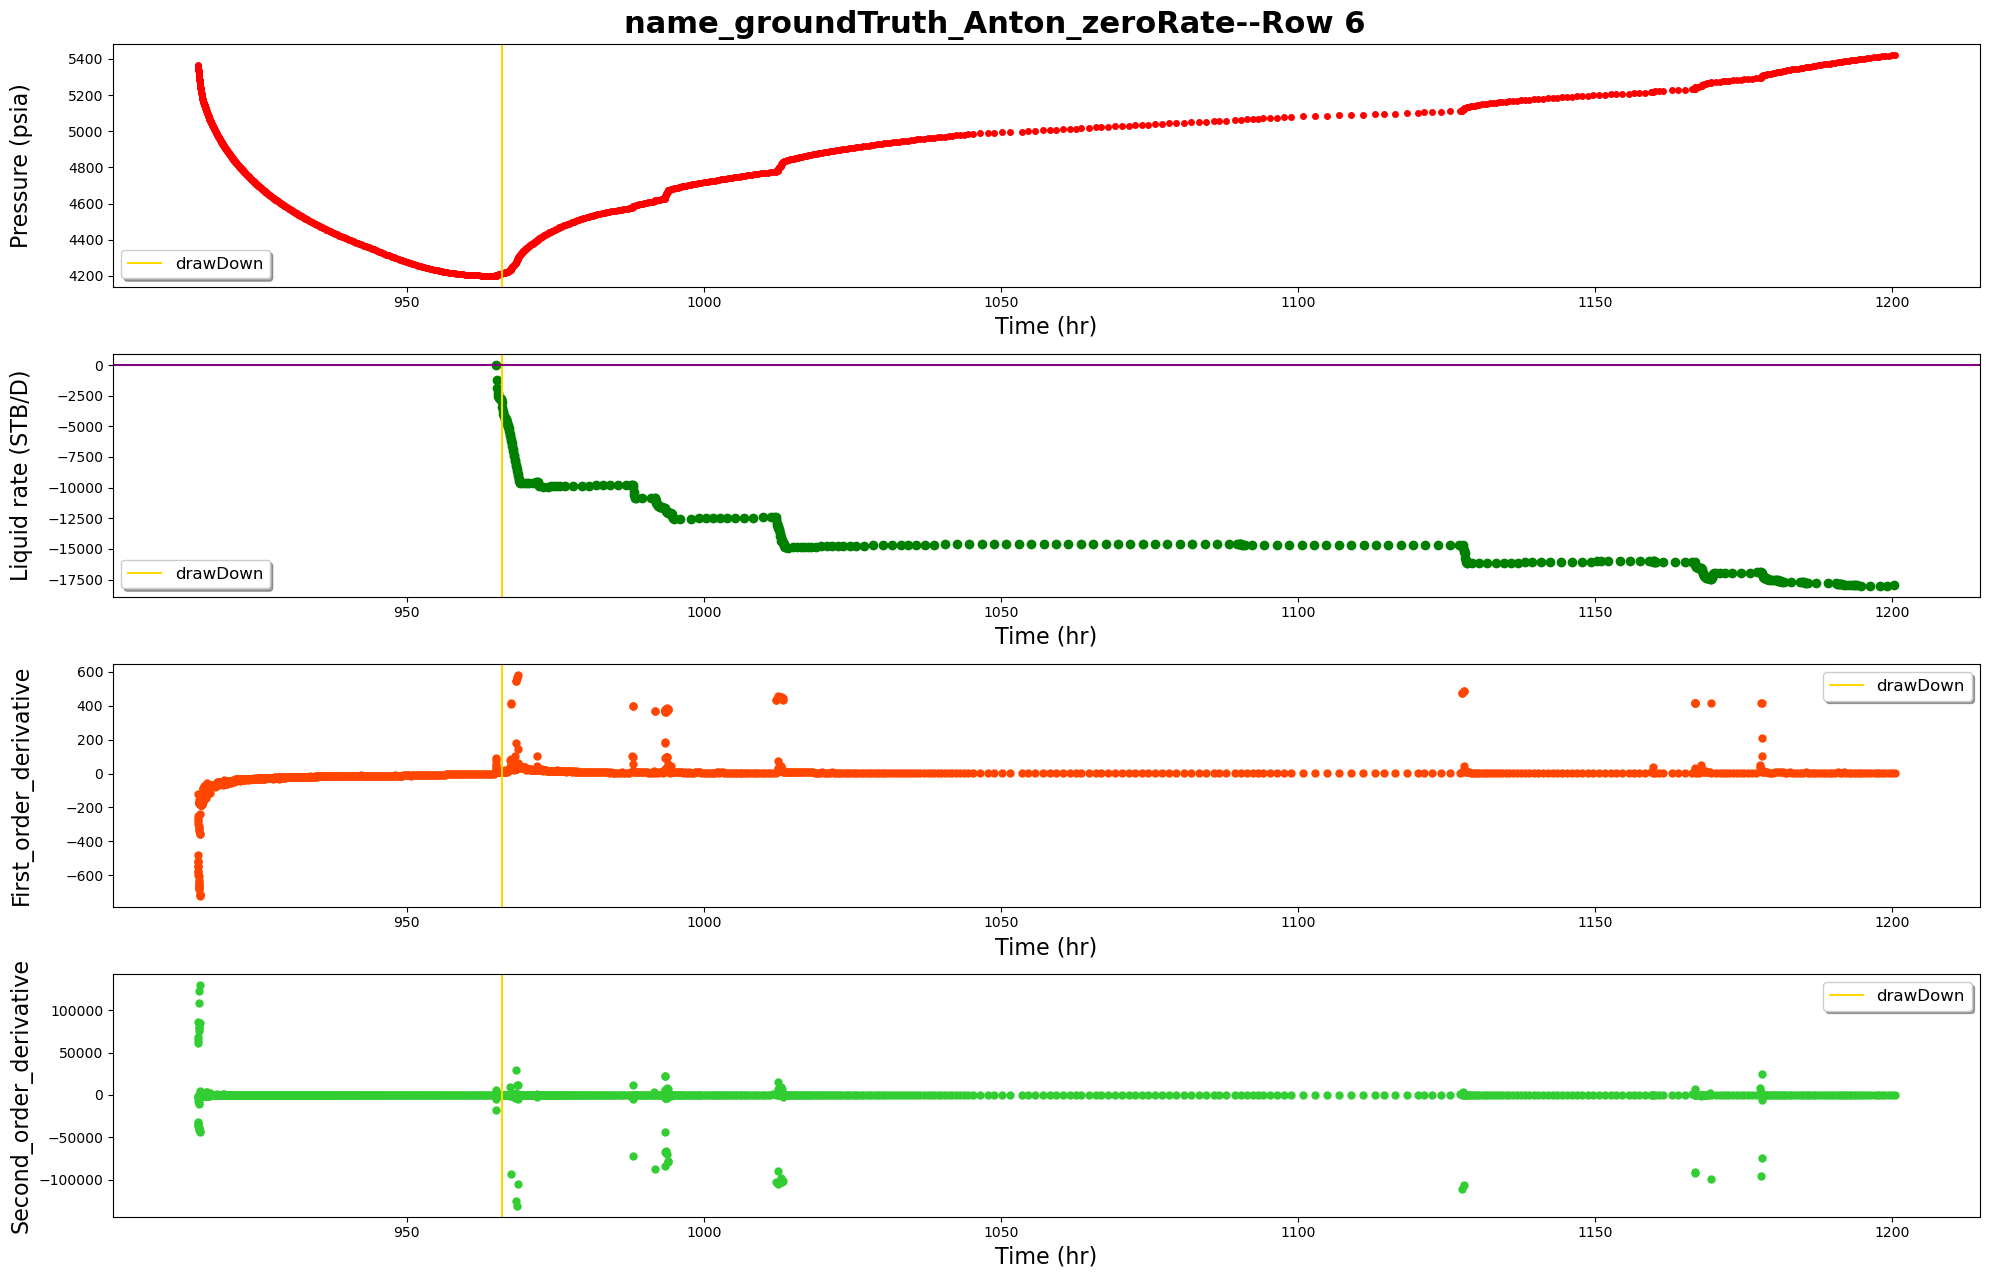

------row 7-----detected points:[7547, 8364]


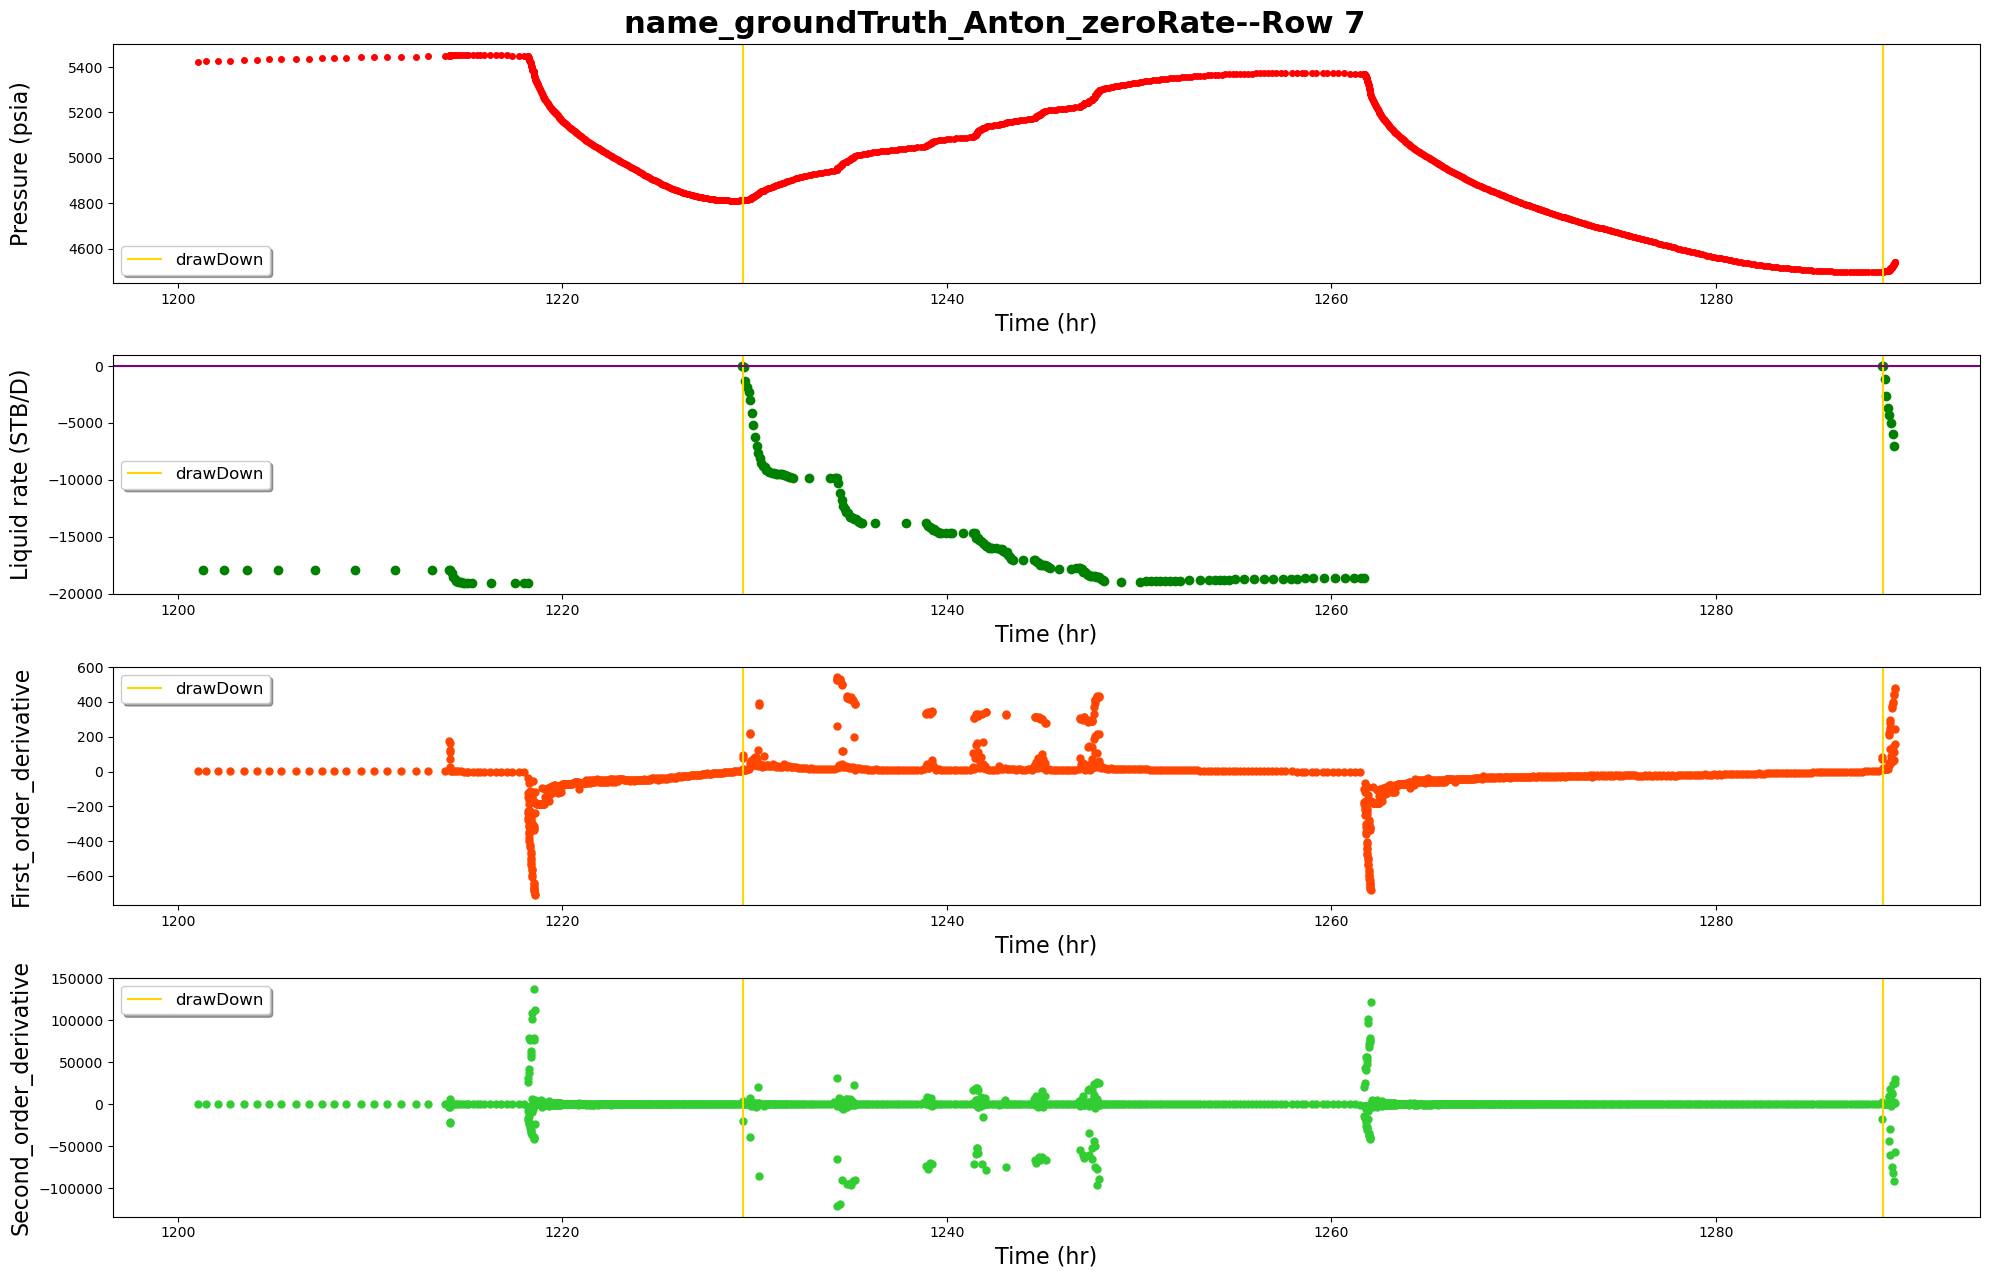

------row 8-----detected points:[]


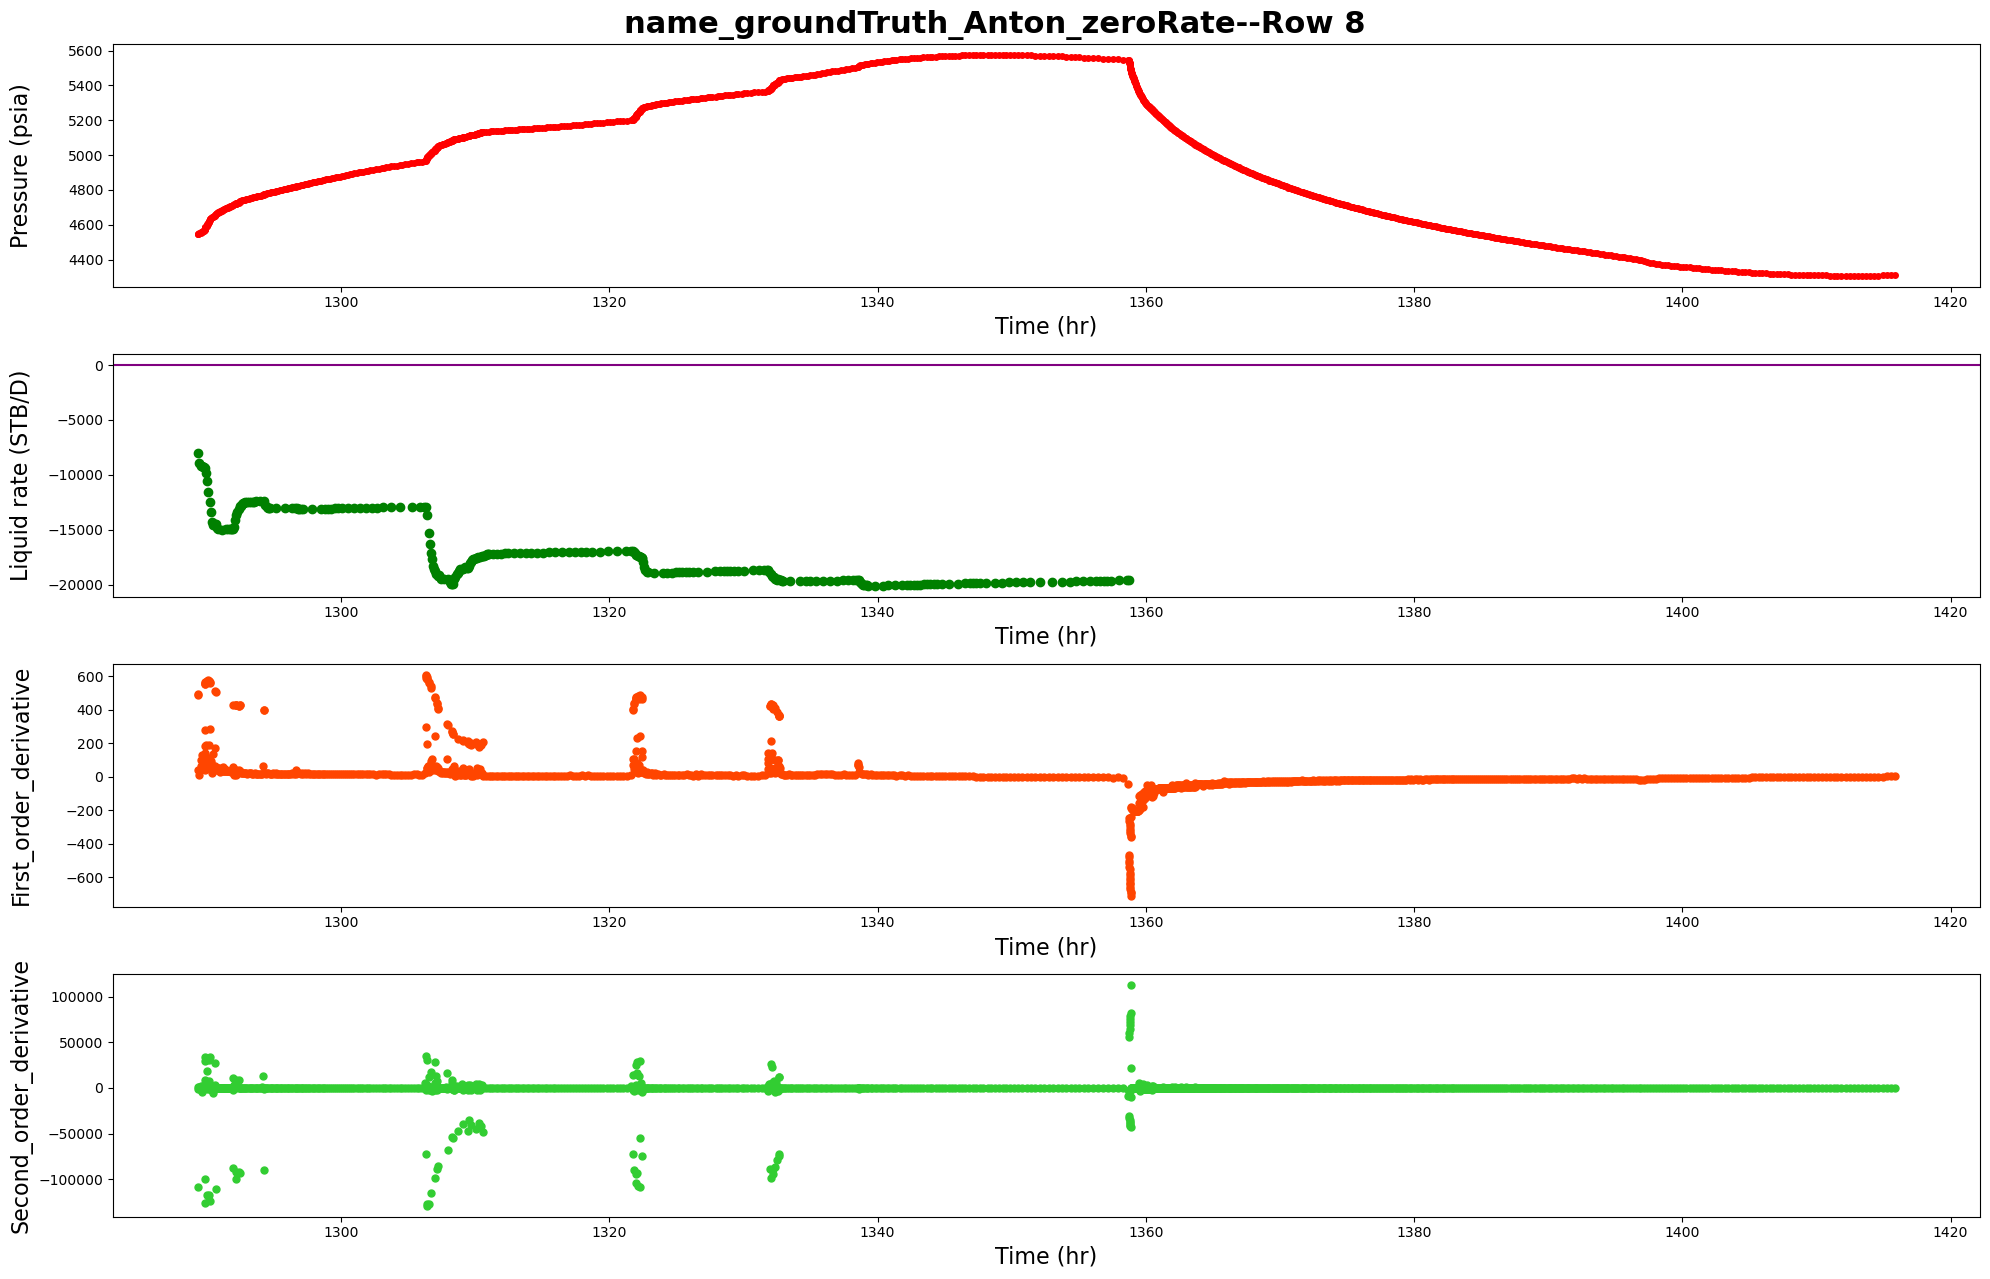

------row 9-----detected points:[9614]


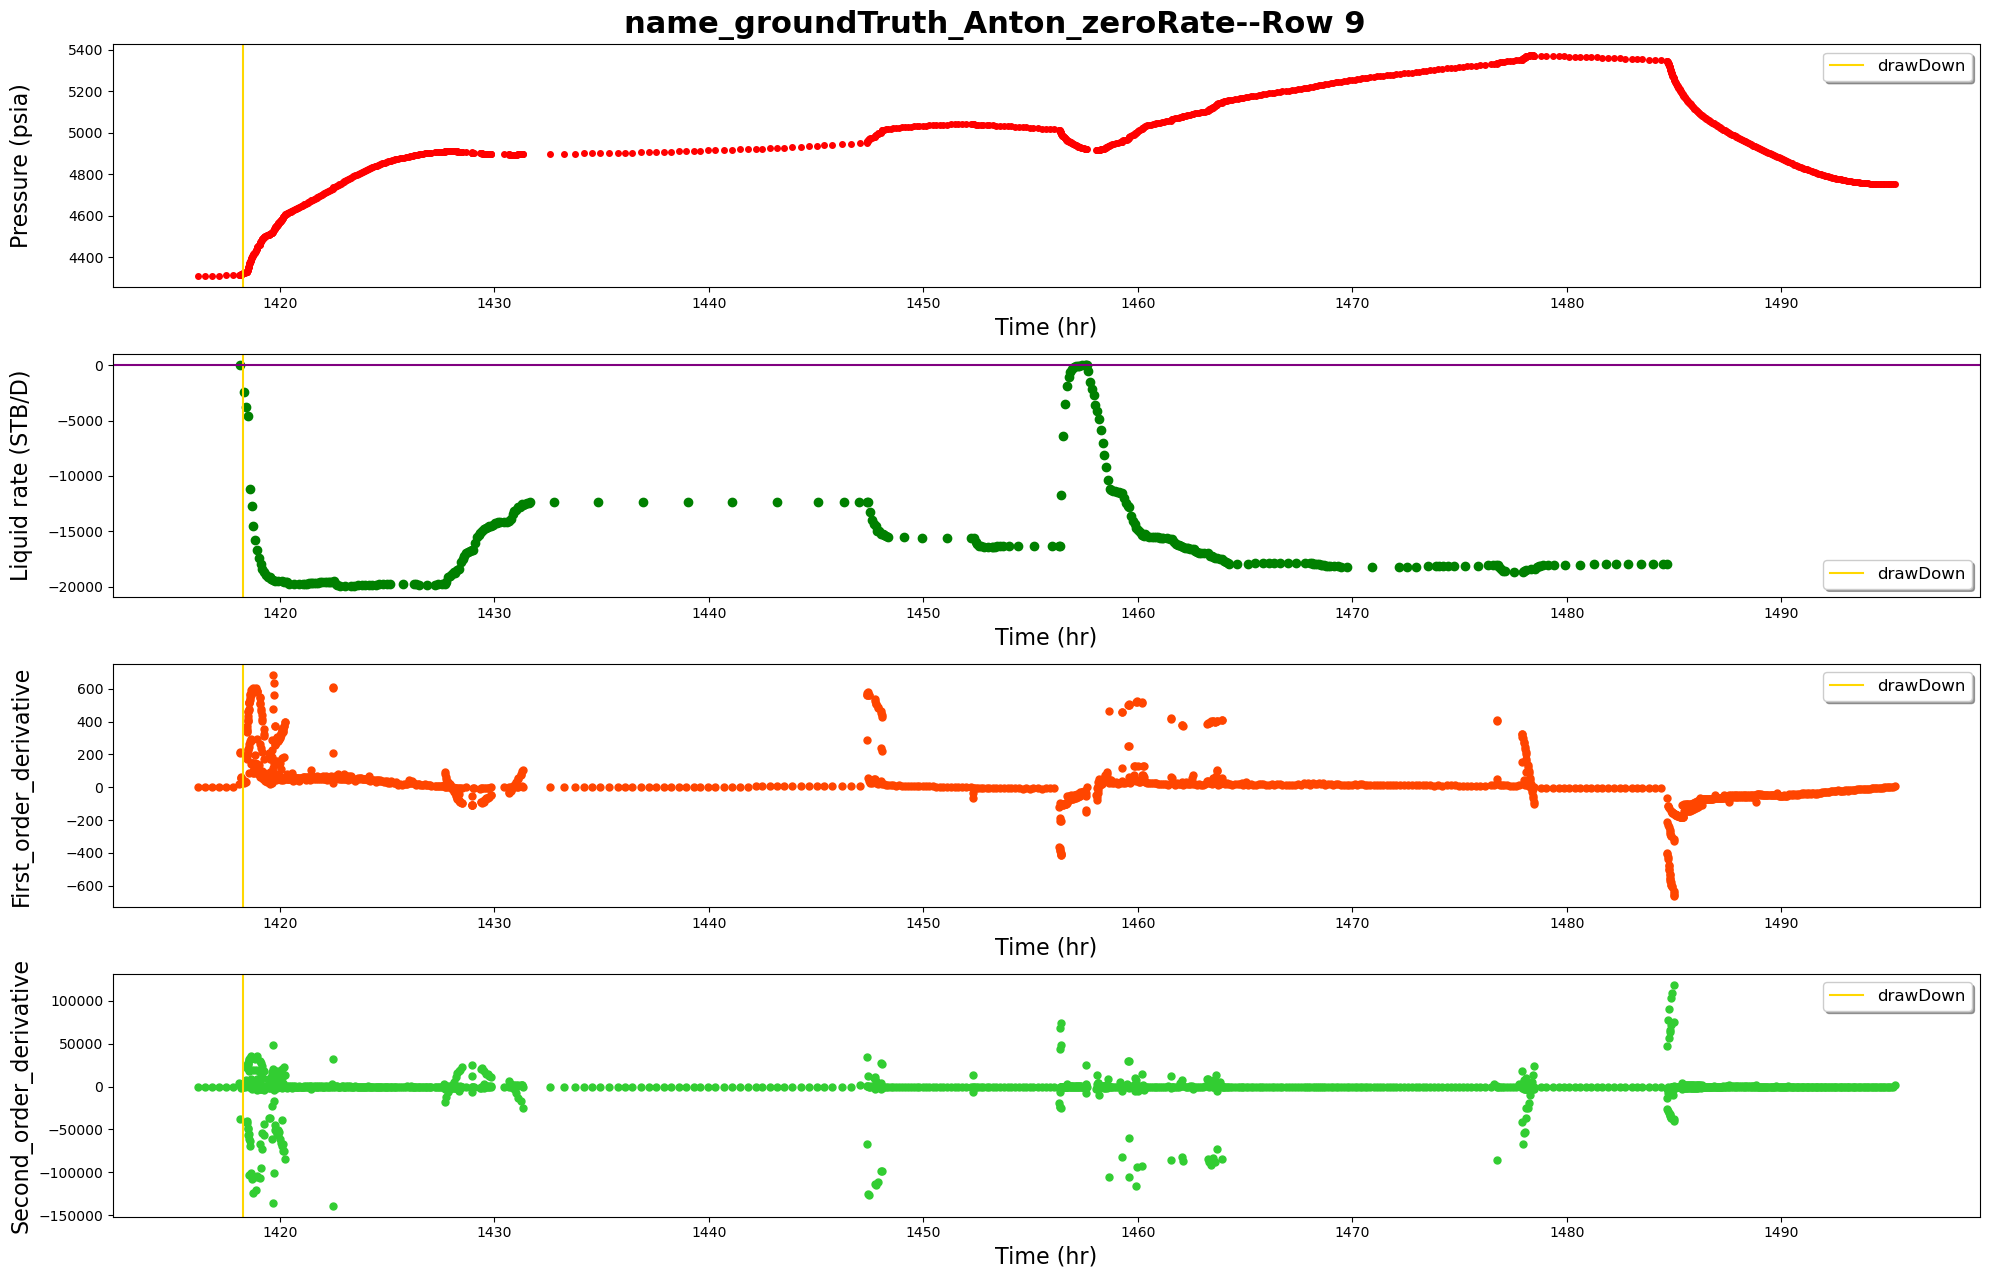

------row 10-----detected points:[10806, 11479]


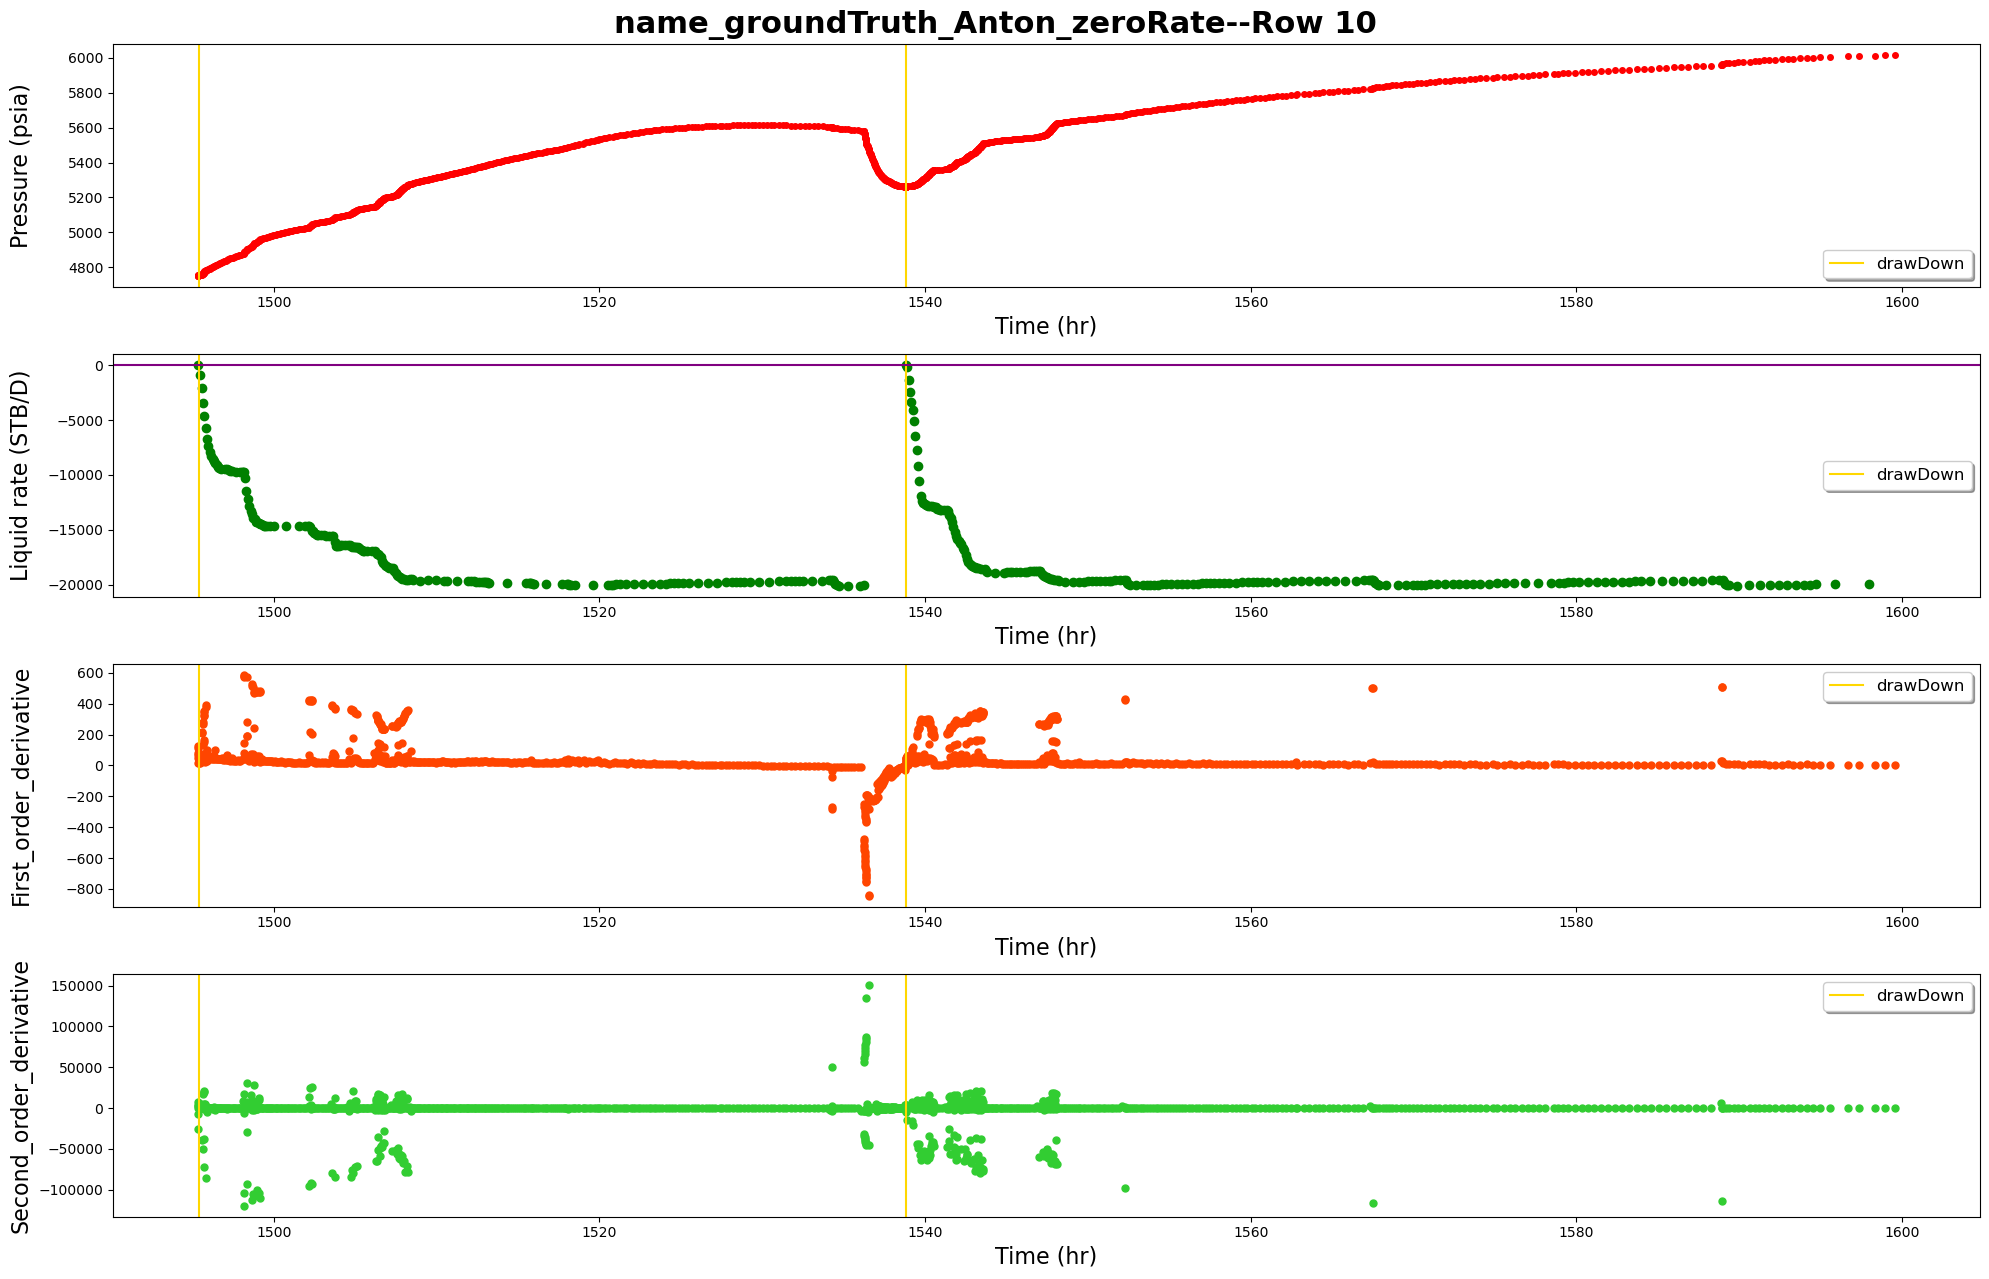

------row 11-----detected points:[13040]


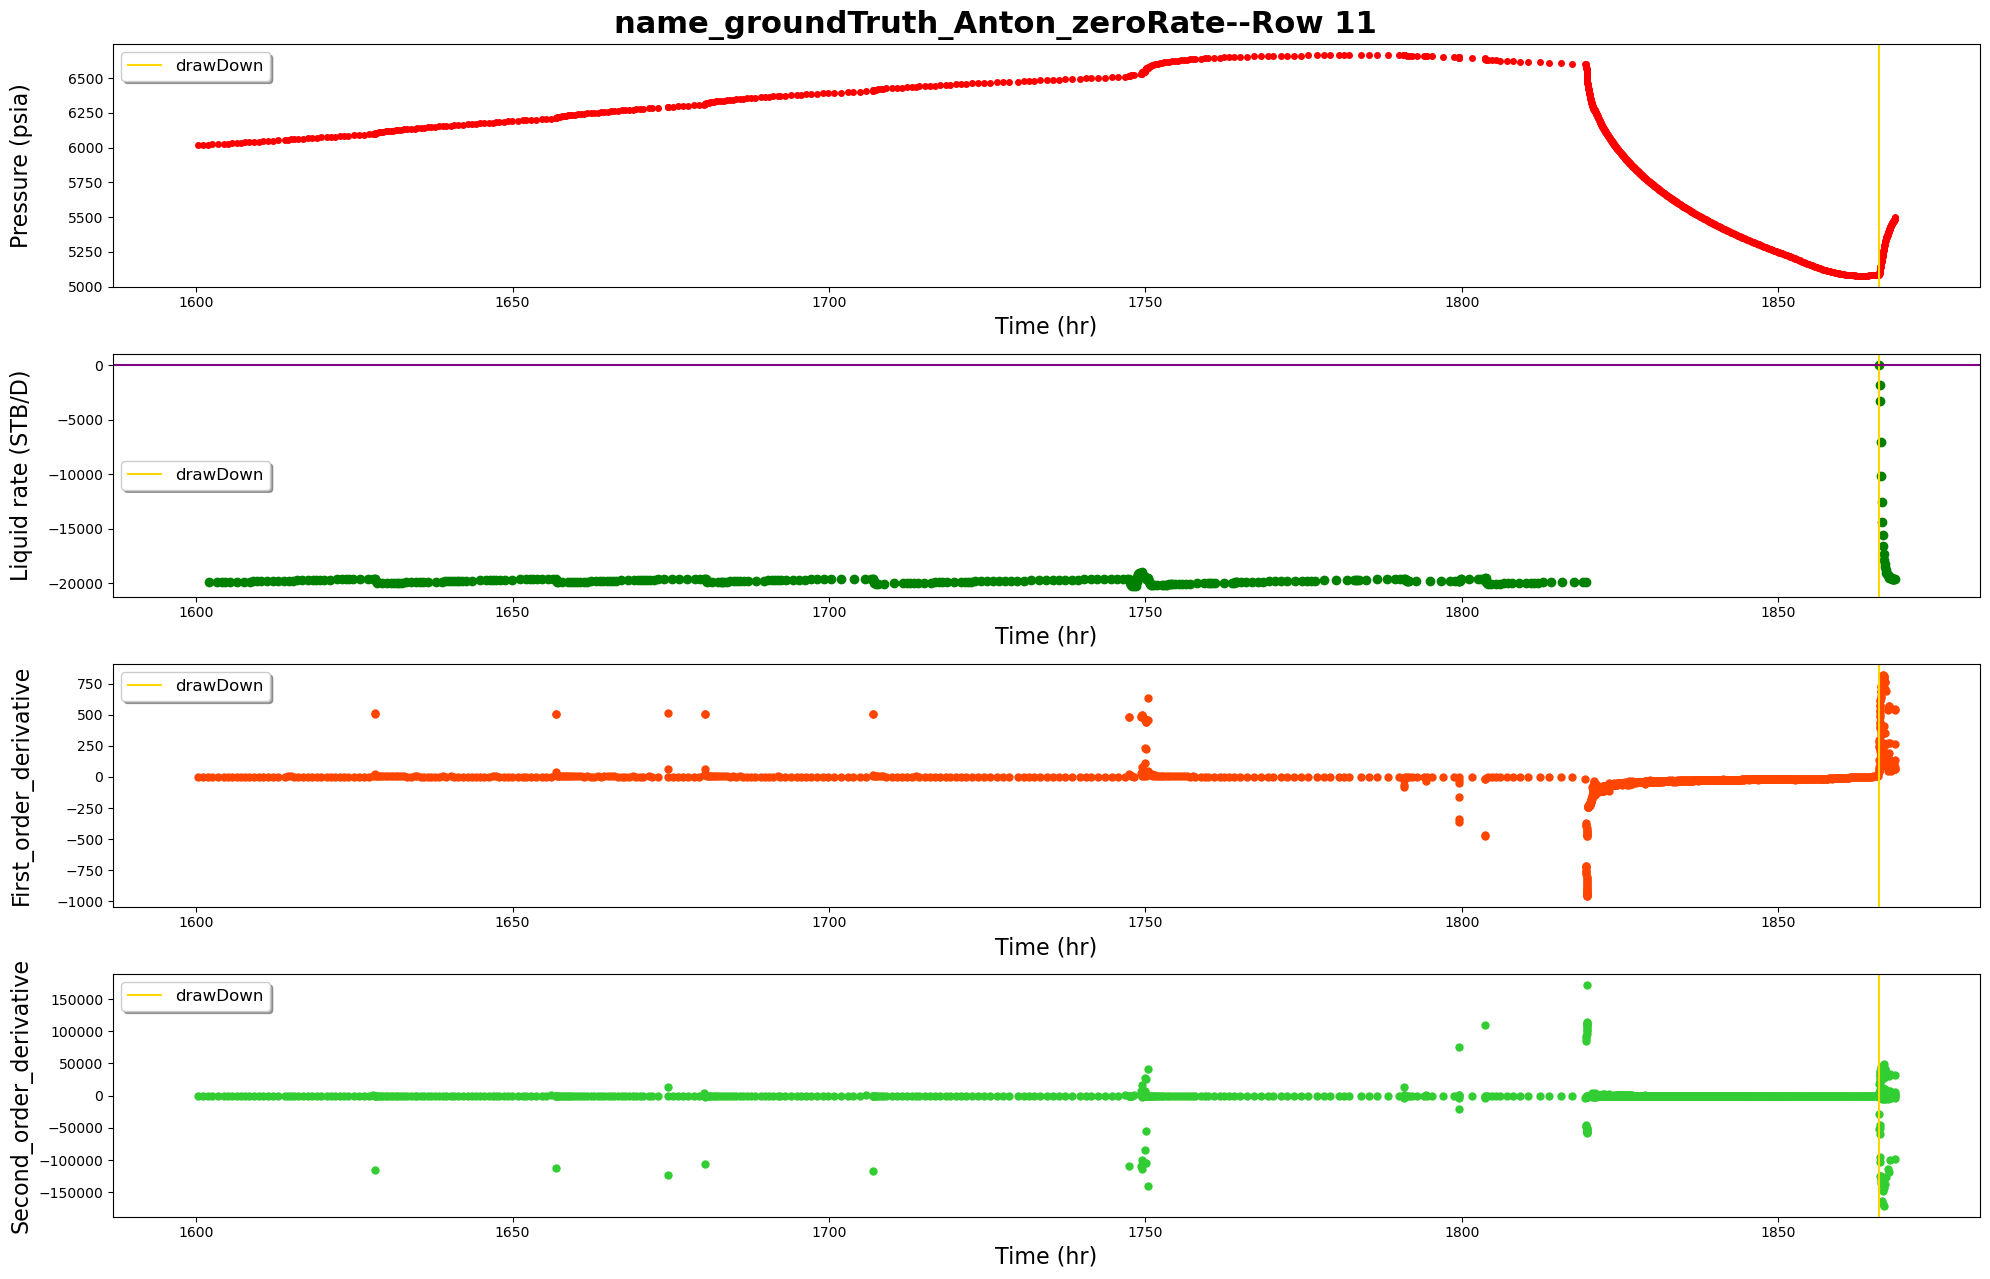

------row 12-----detected points:[14088]


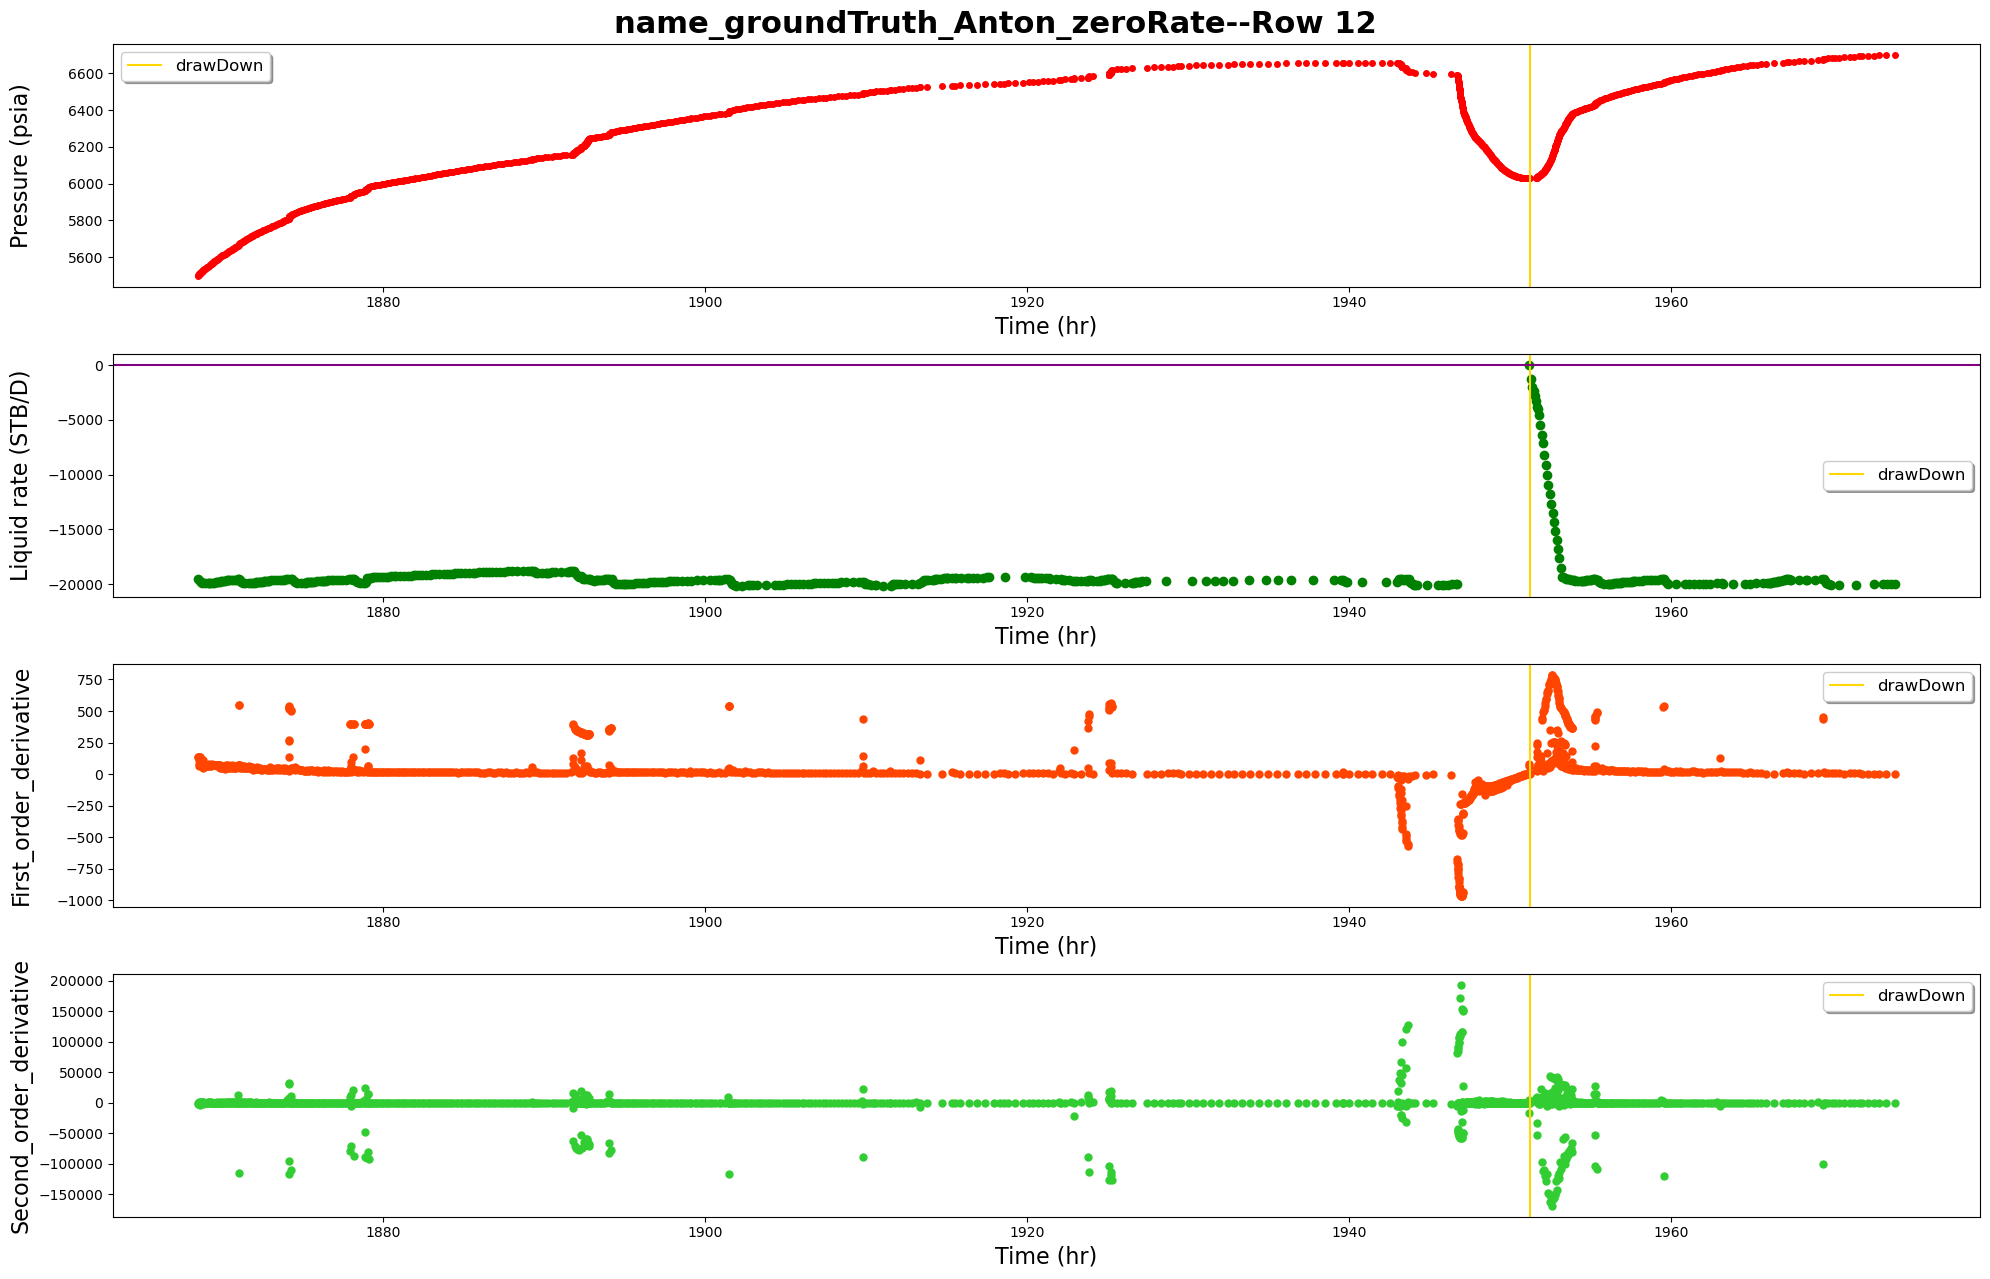

------row 13-----detected points:[15338]


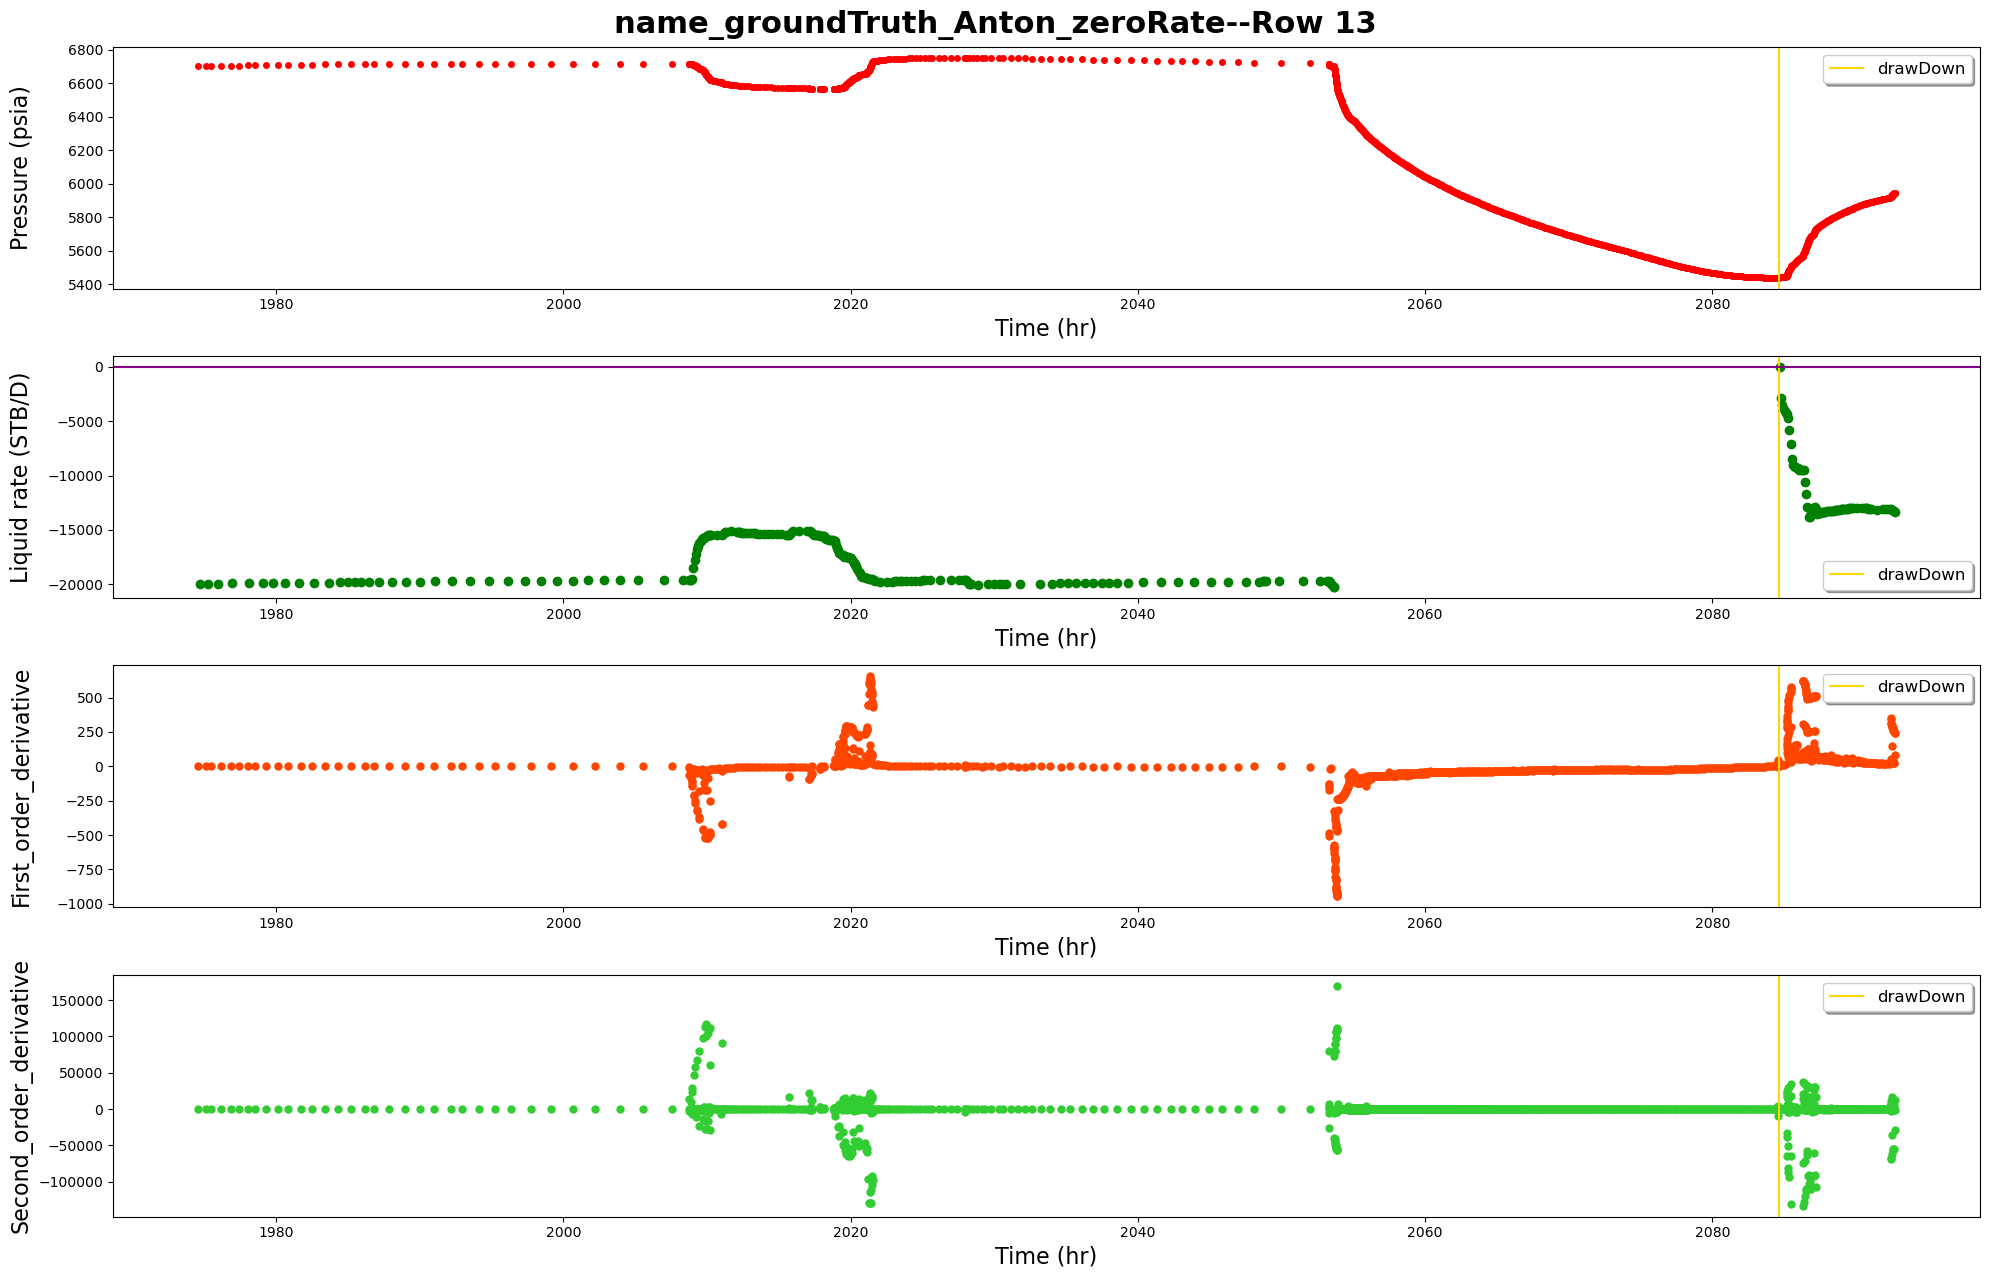

------row 14-----detected points:[16570]


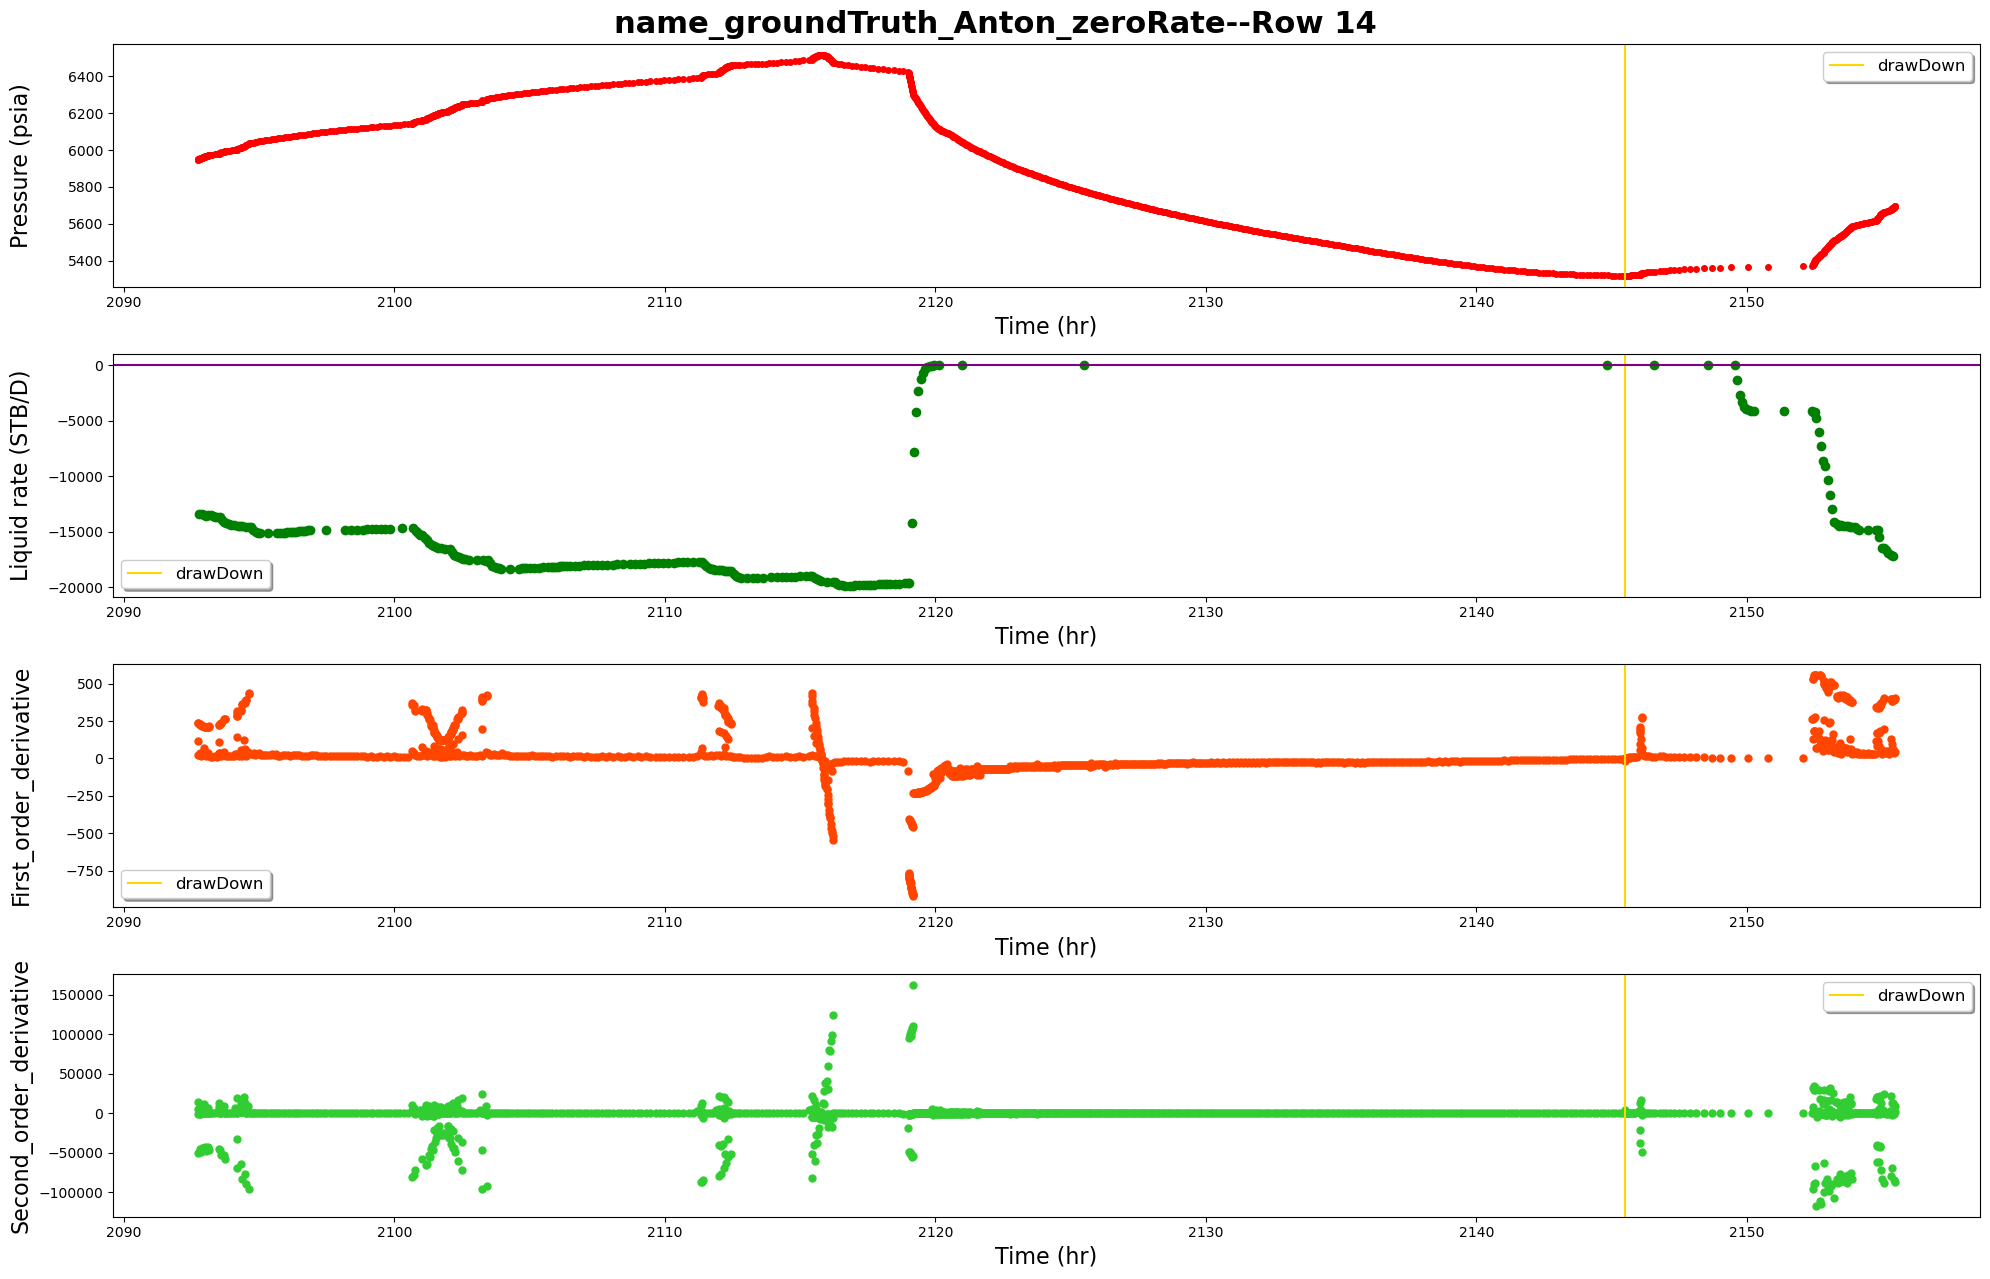

------row 15-----detected points:[]


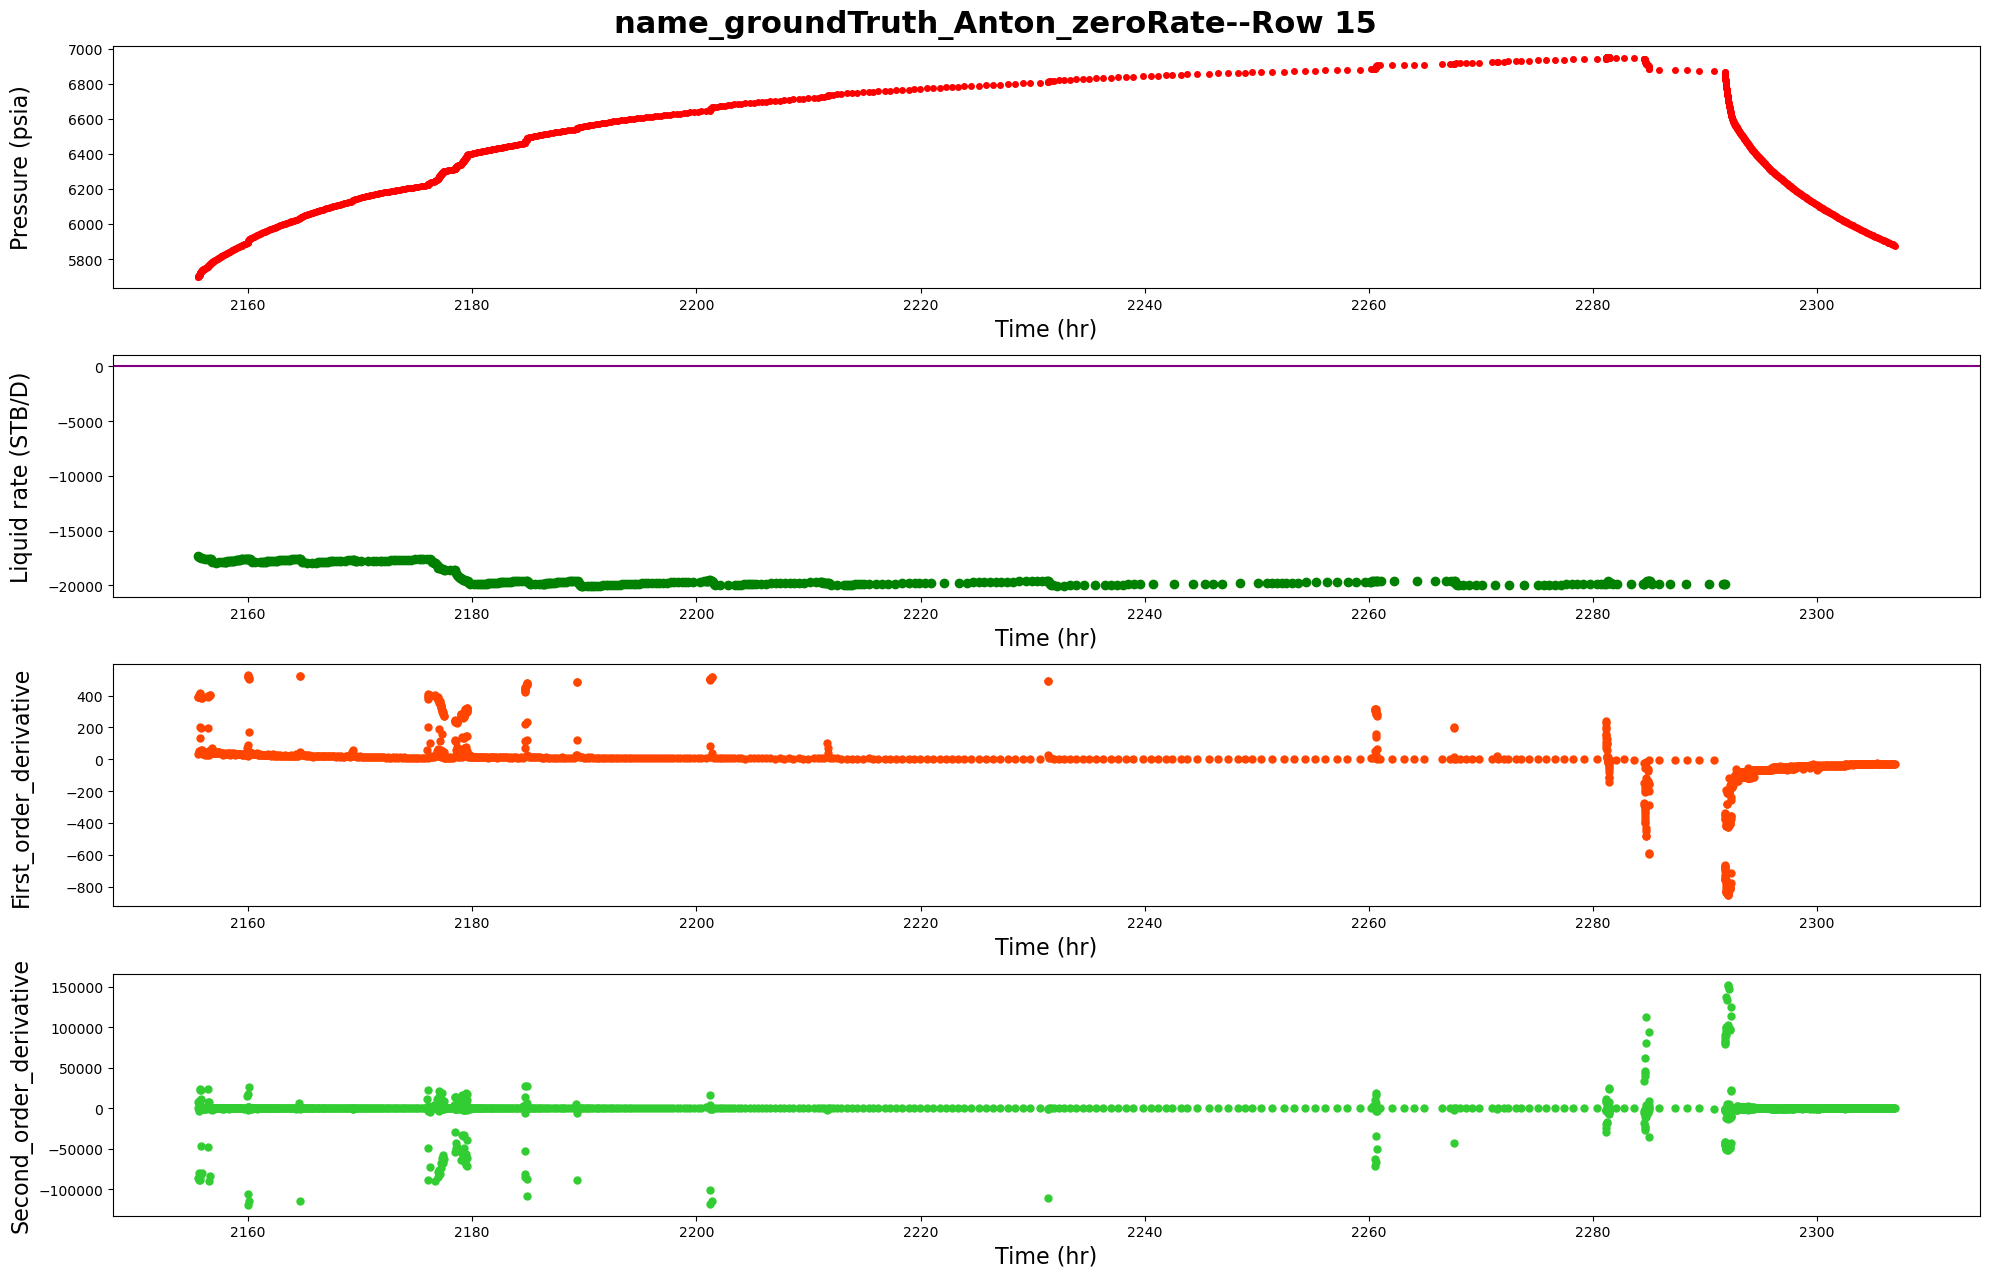

------row 16-----detected points:[18441]


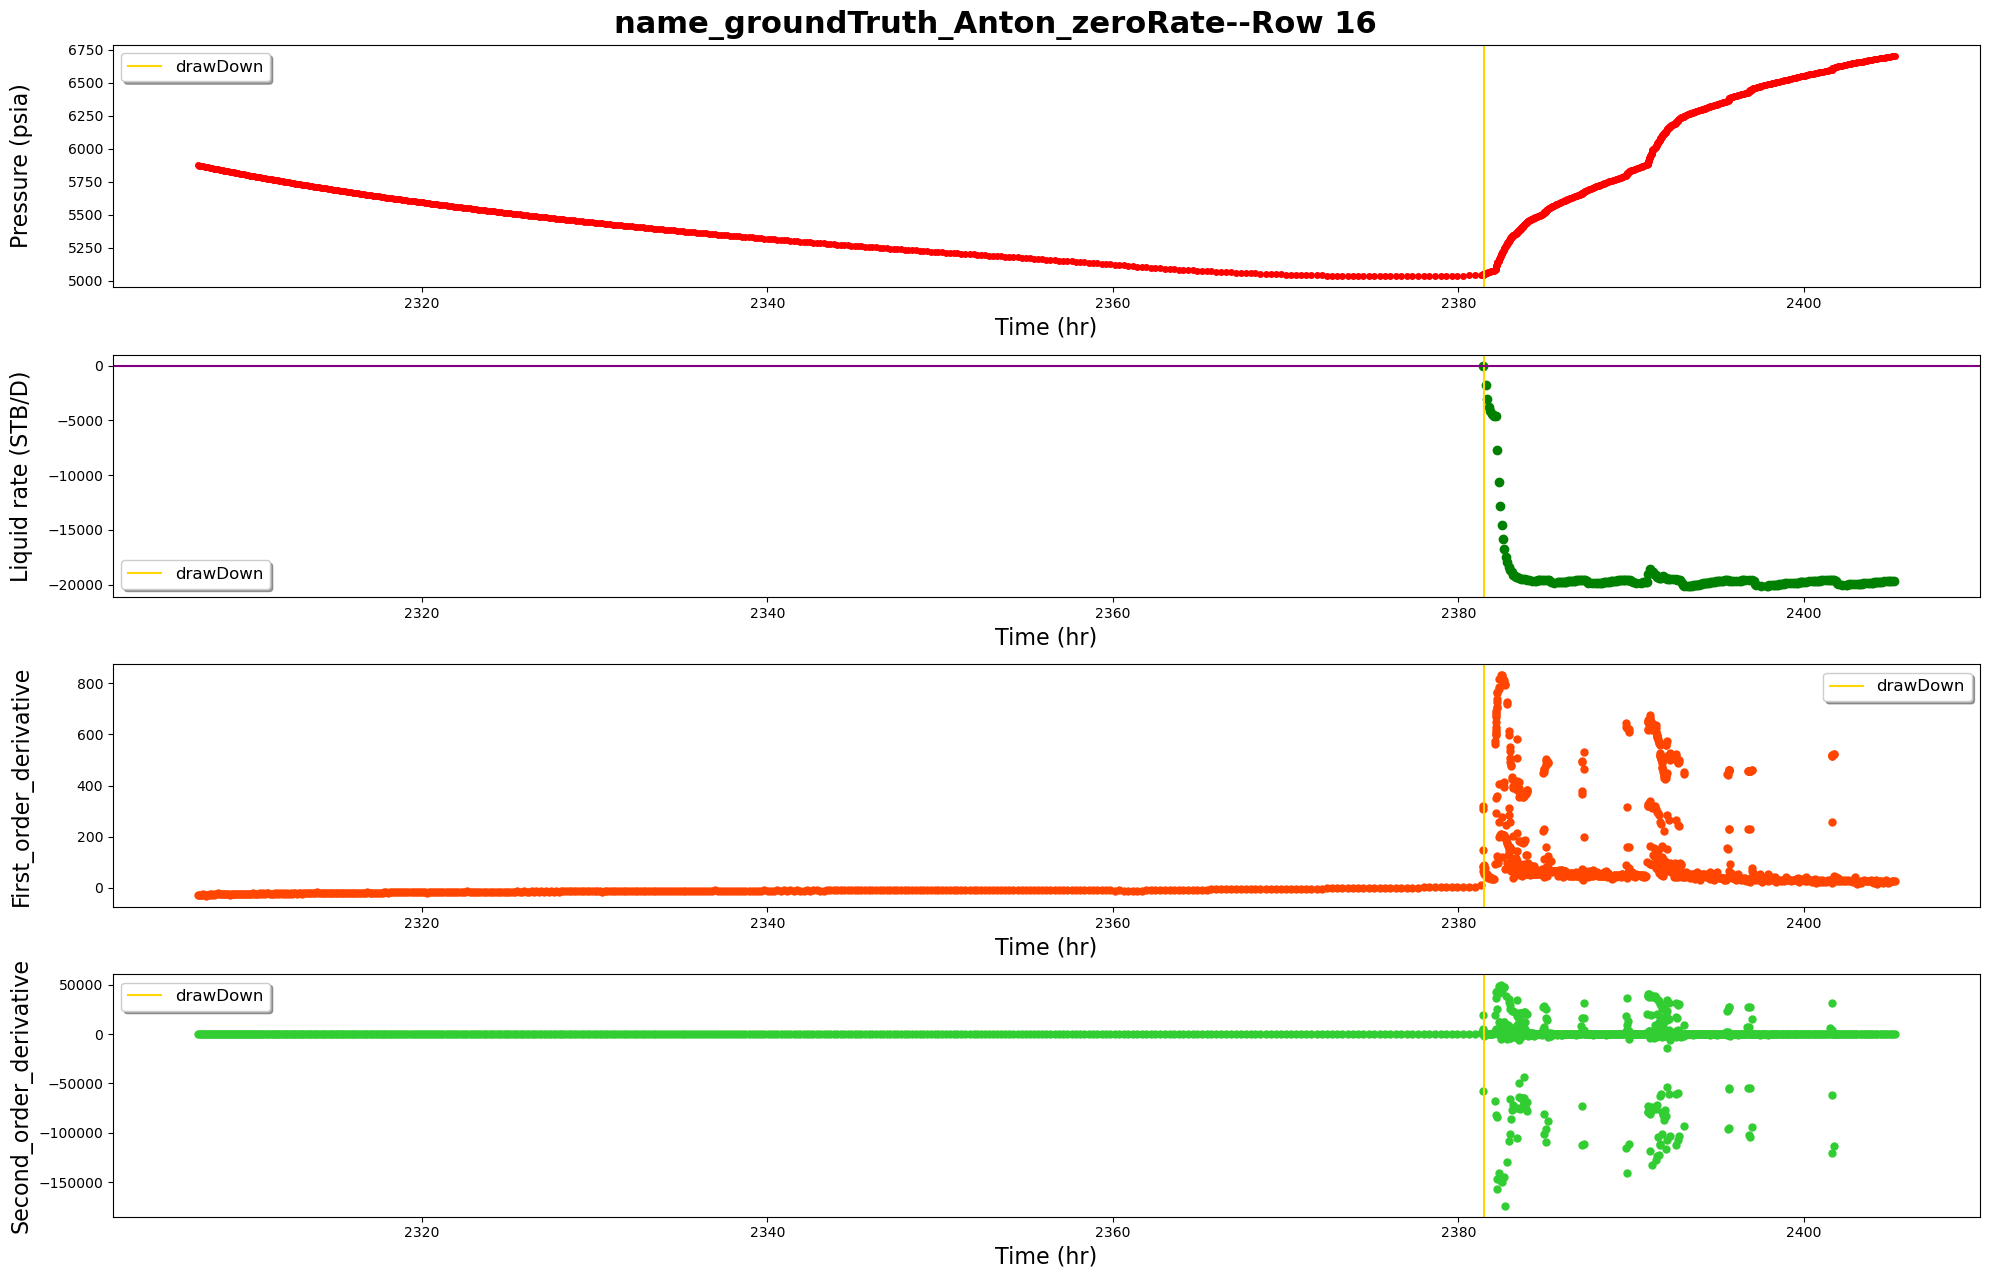

------row 17-----detected points:[20353]


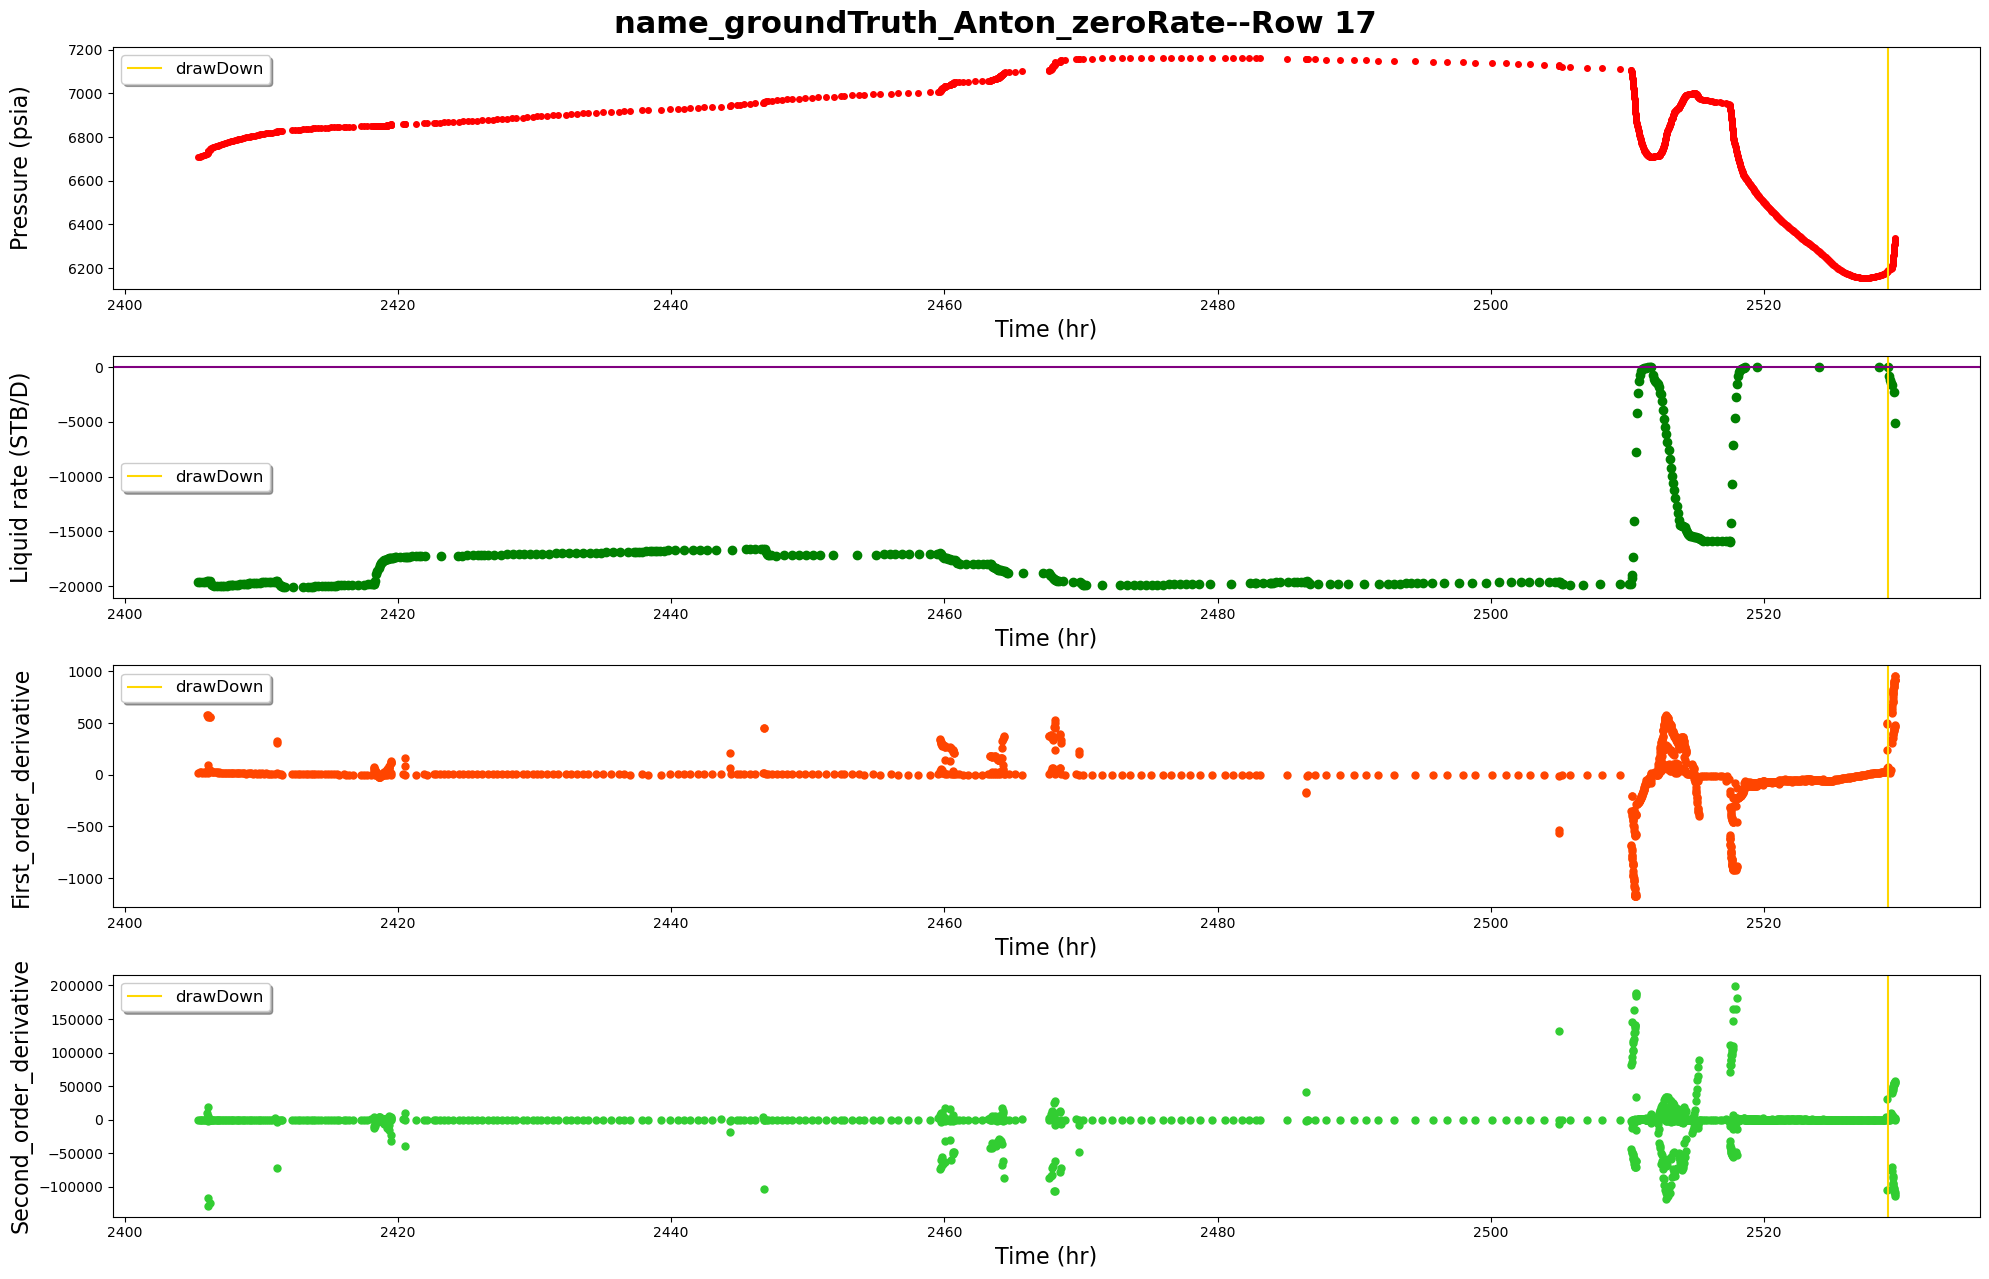

------row 18-----detected points:[21030]


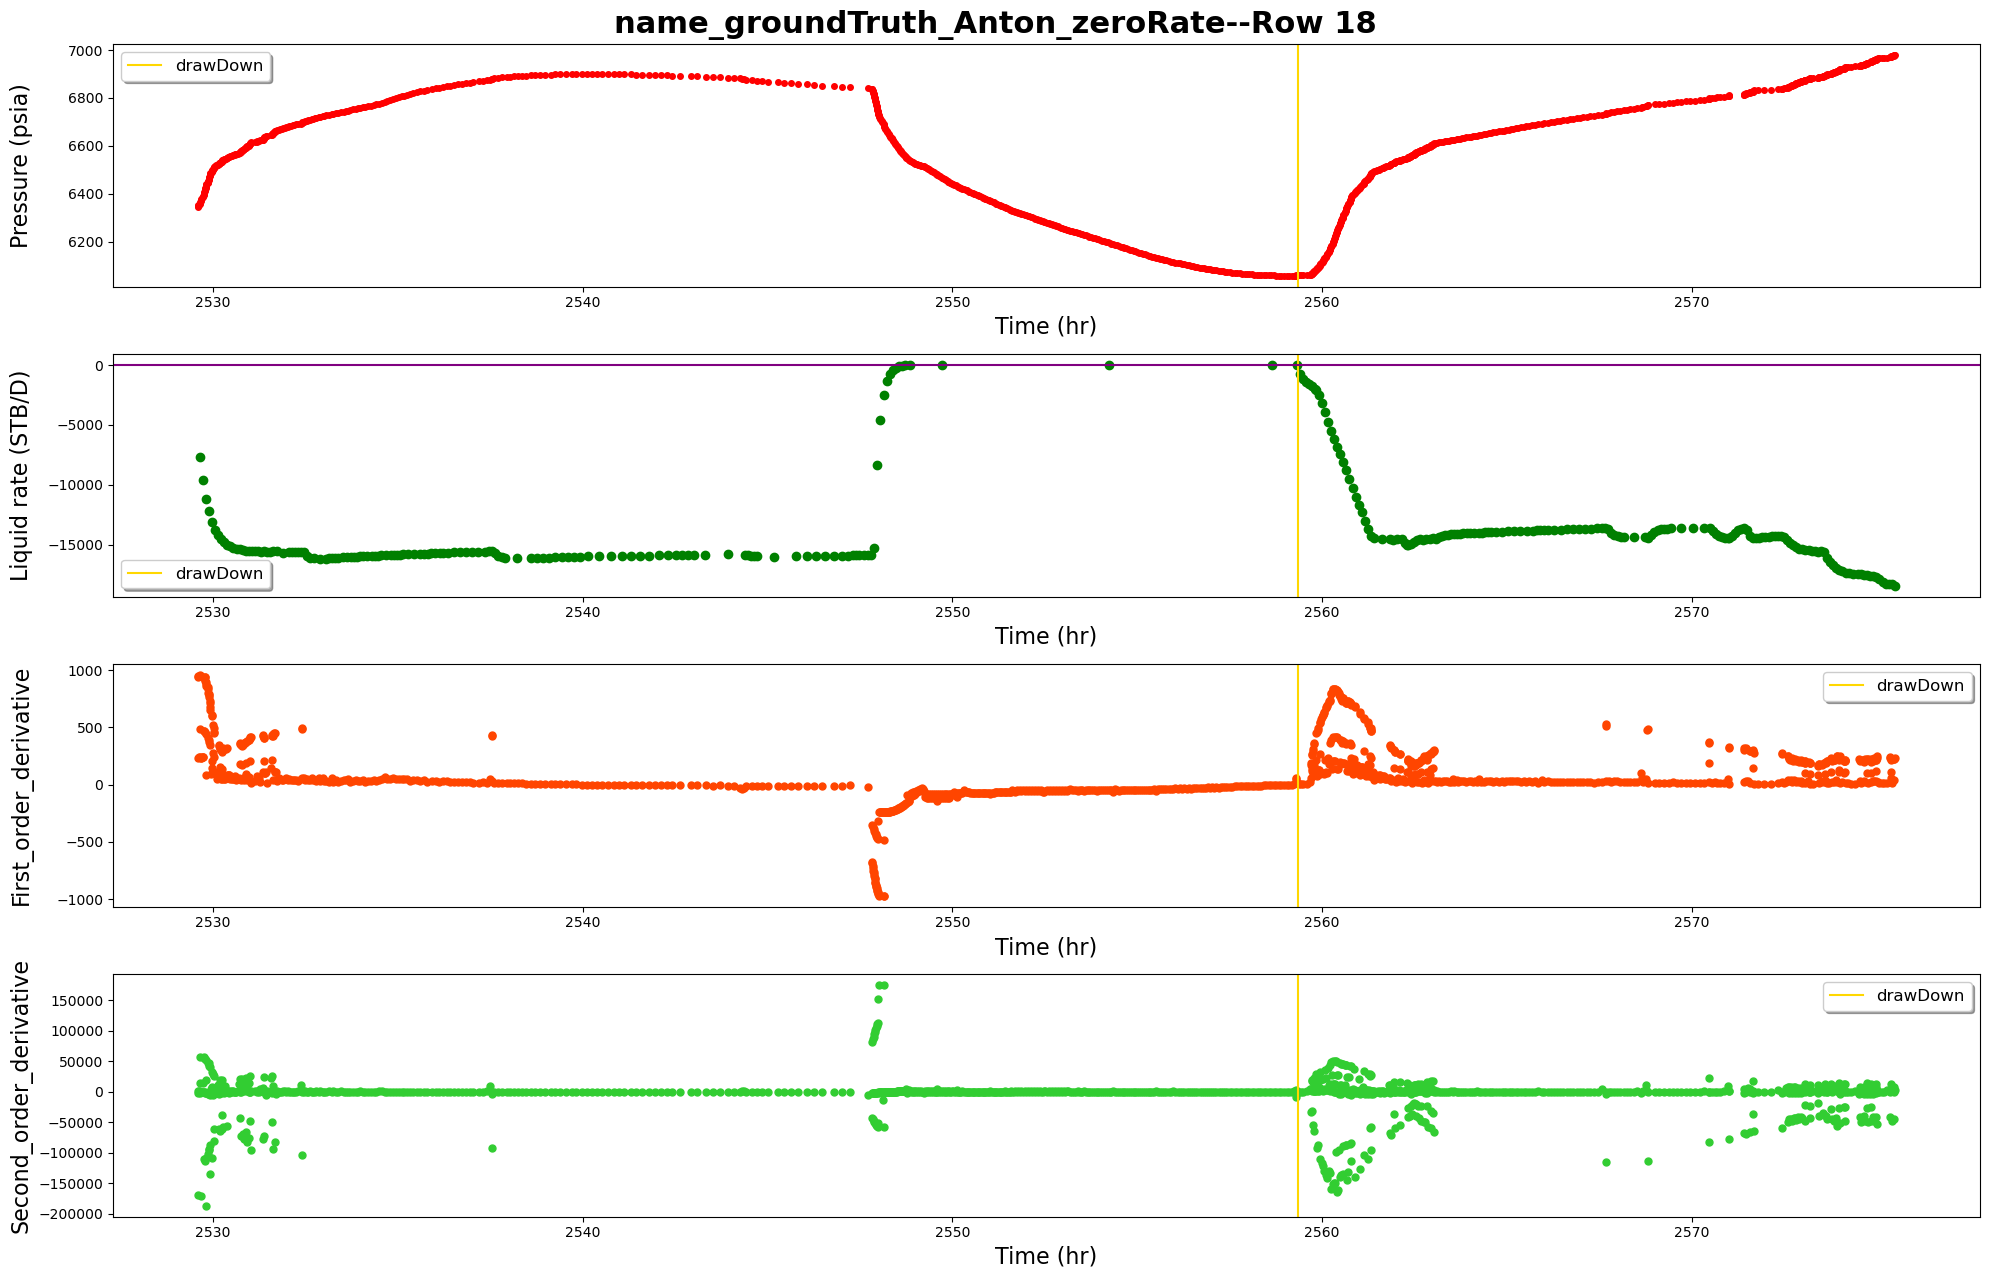

------row 19-----detected points:[22187]


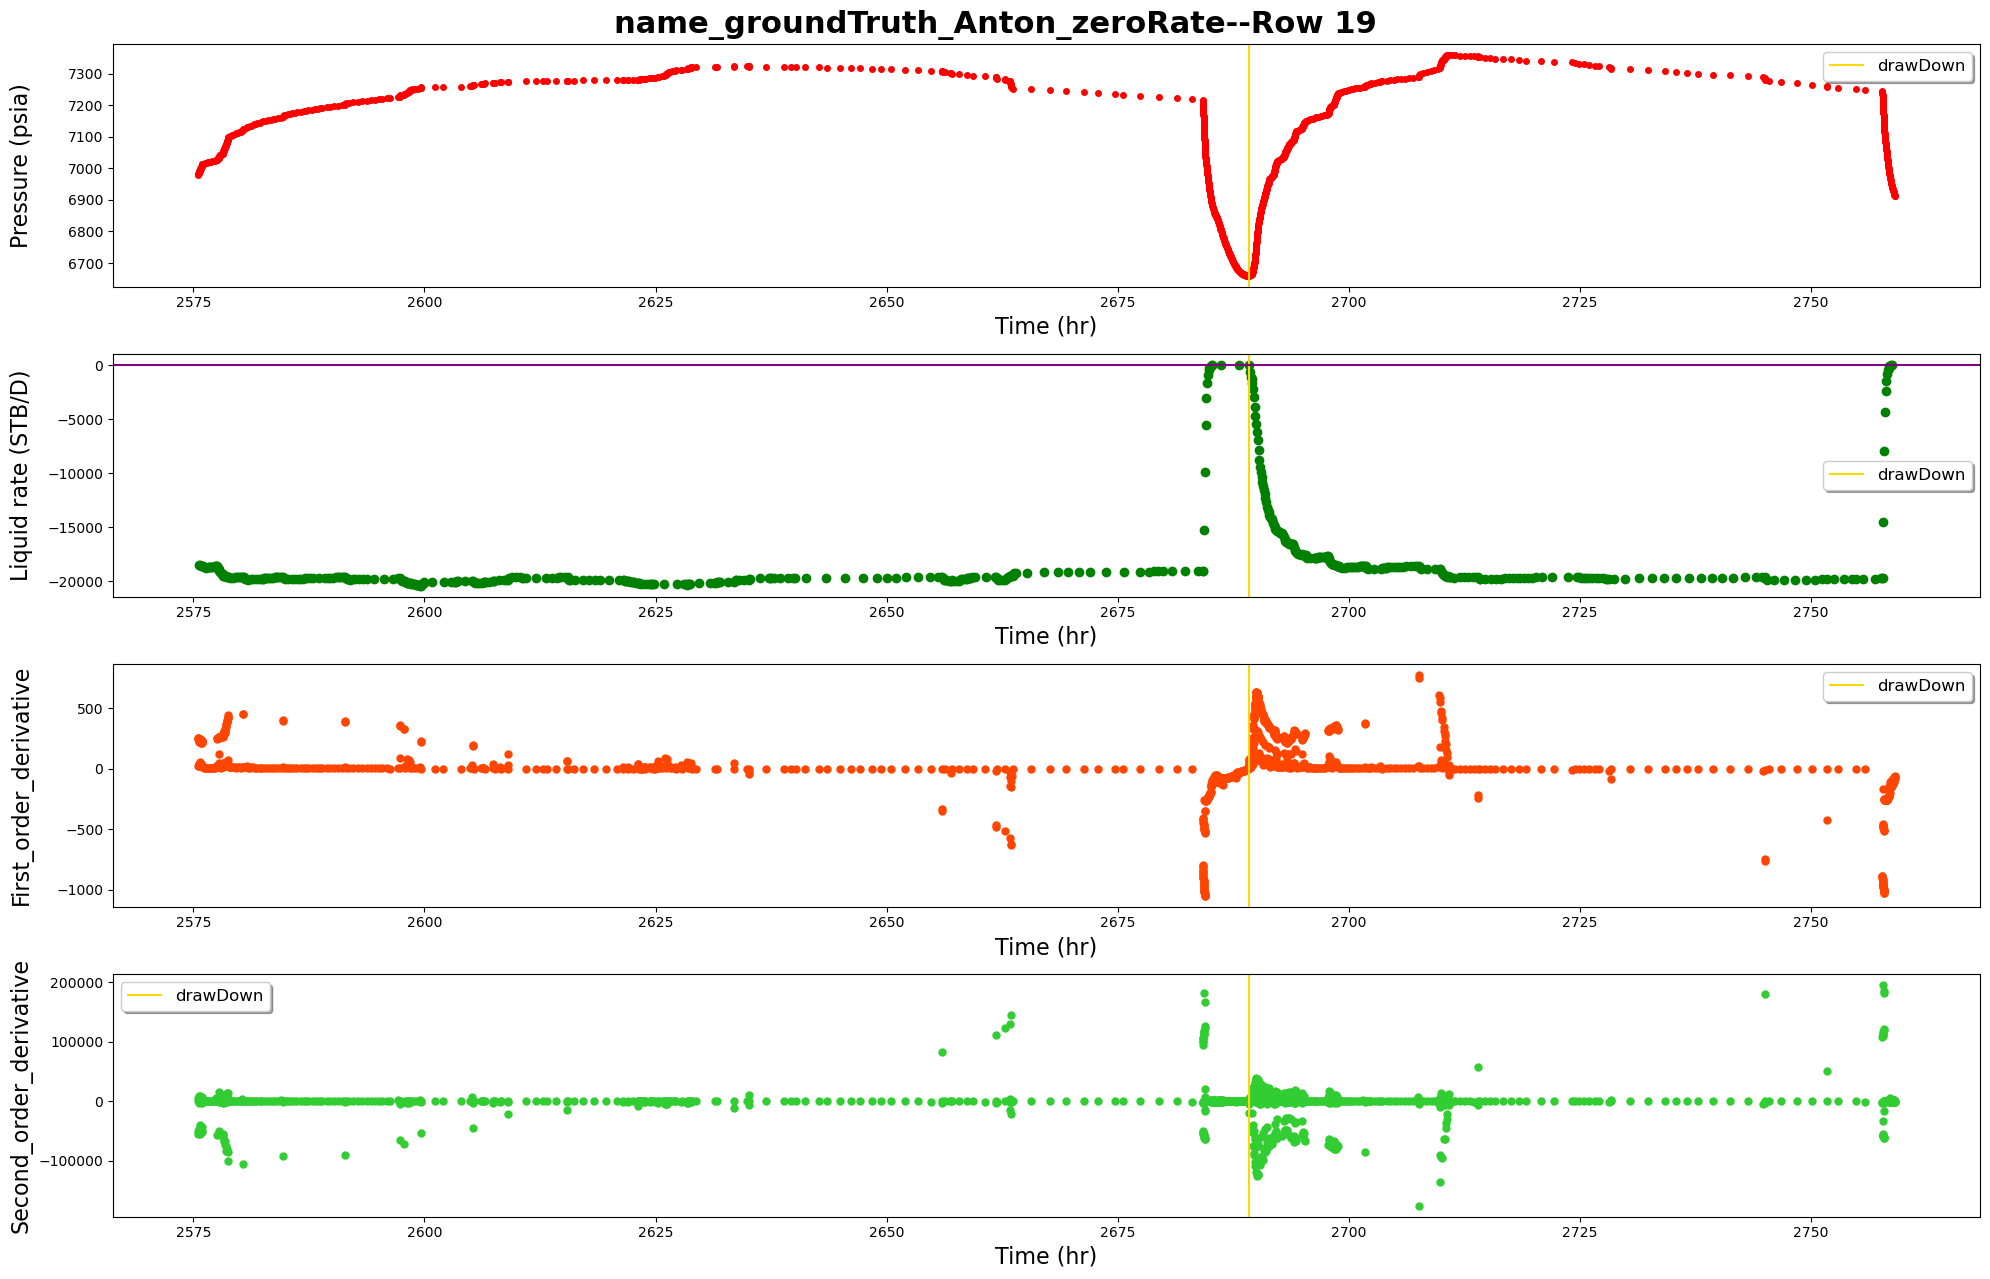

------row 20-----detected points:[23219]


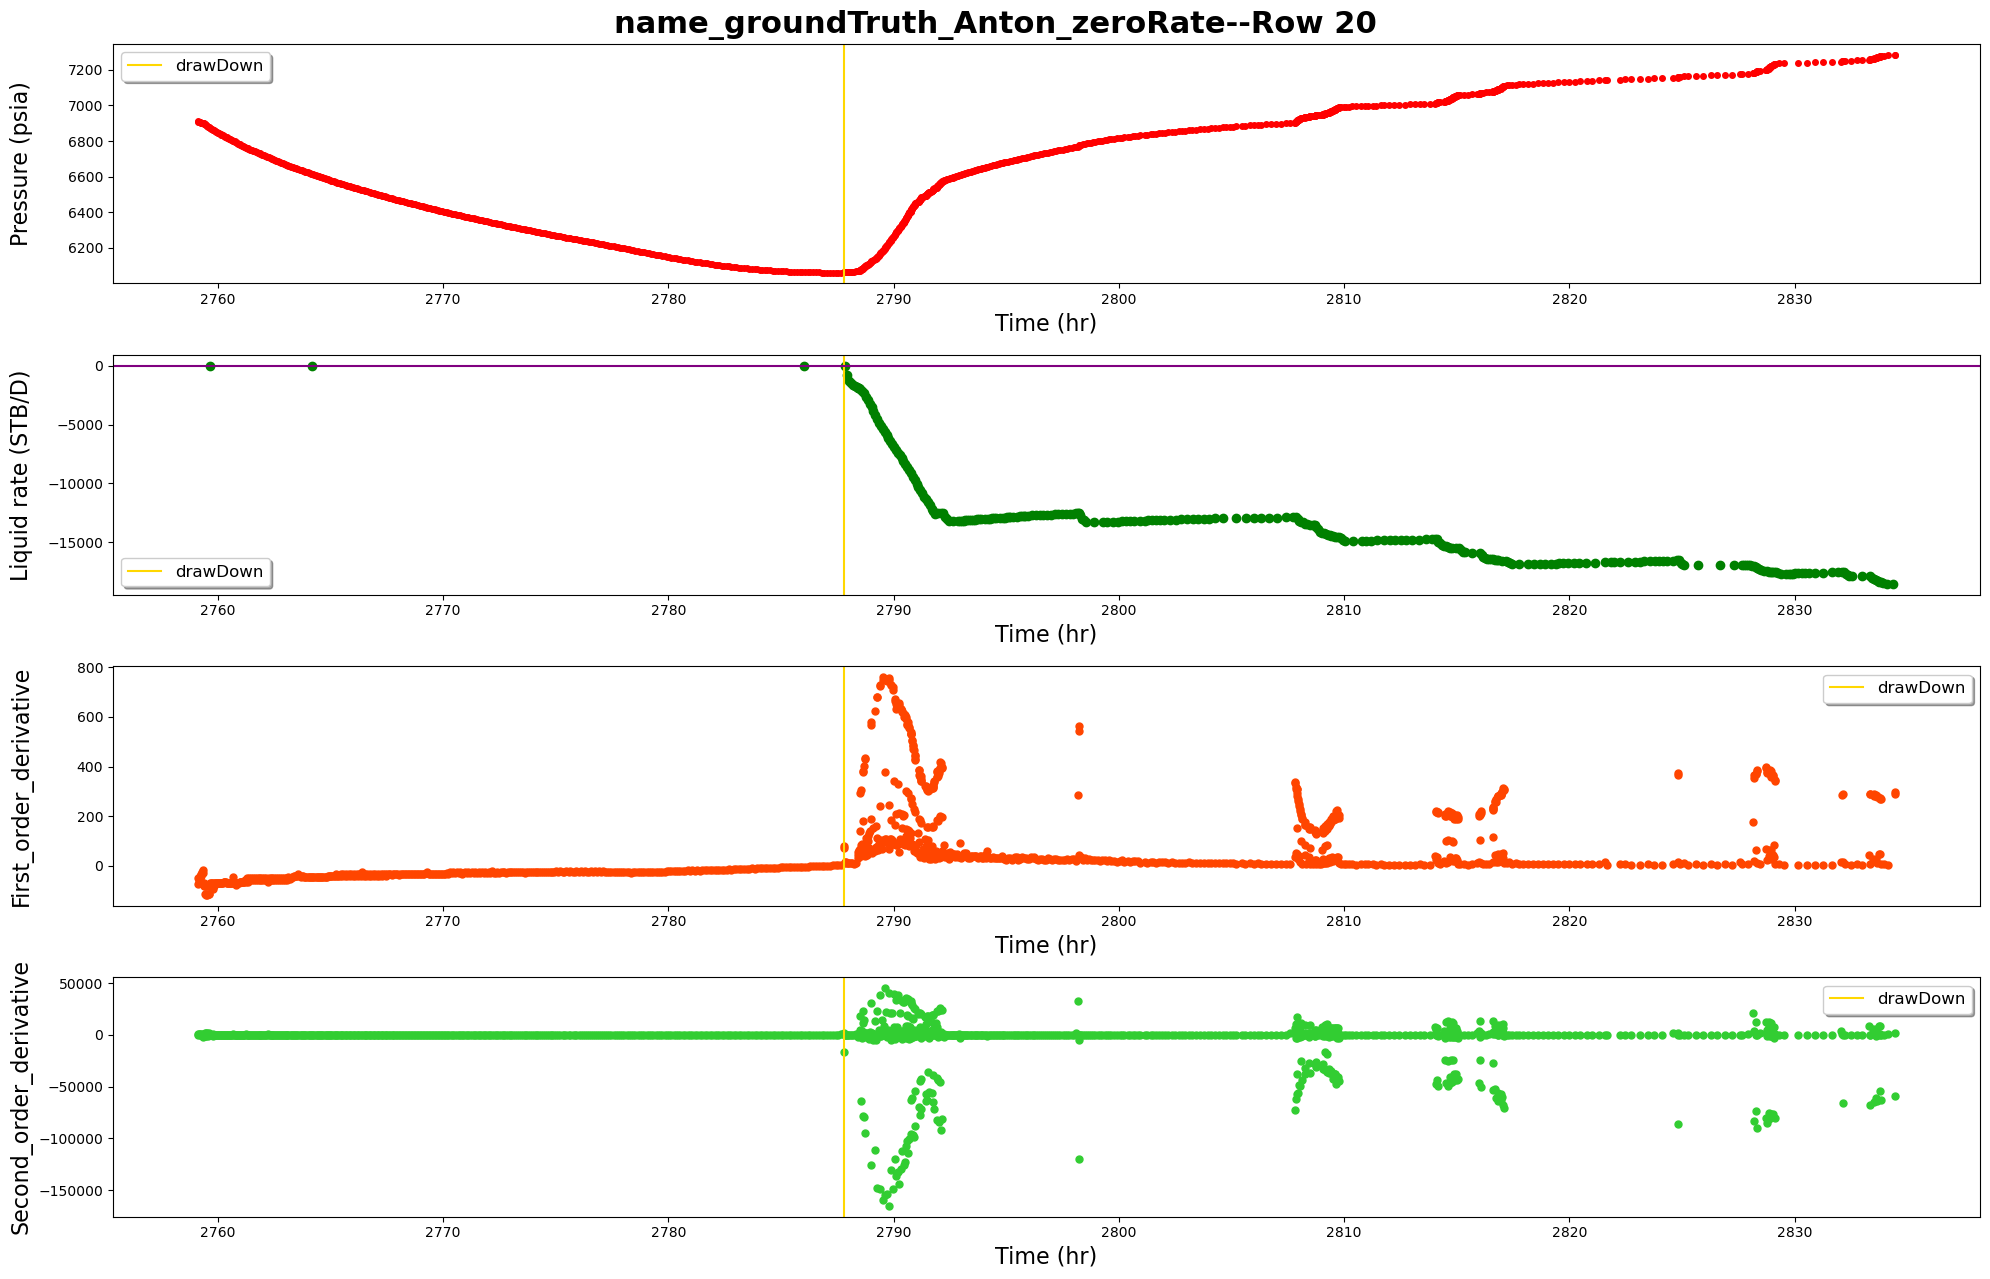

------row 21-----detected points:[]


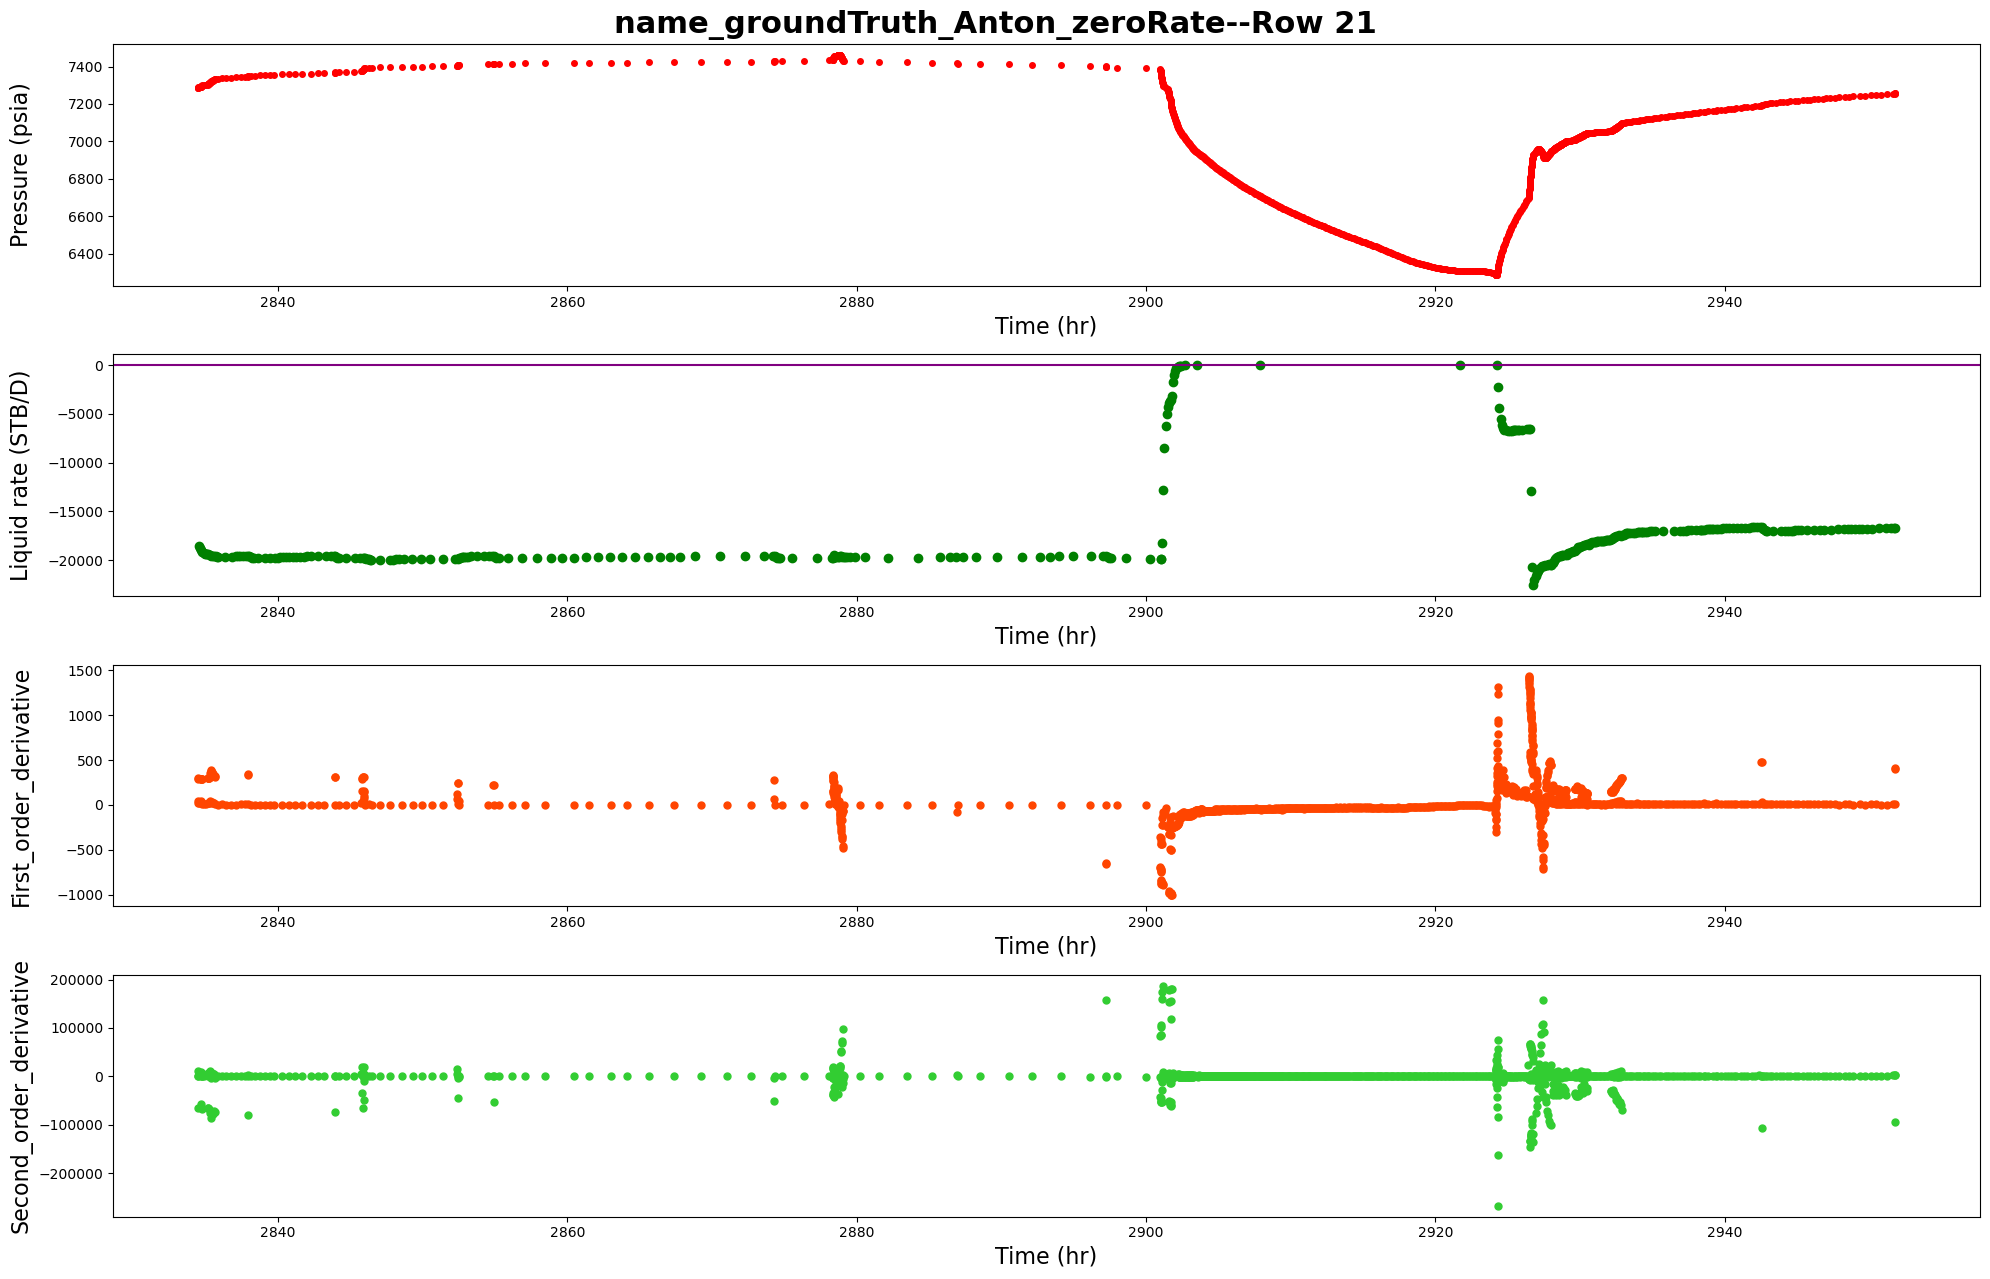

------row 22-----detected points:[26008]


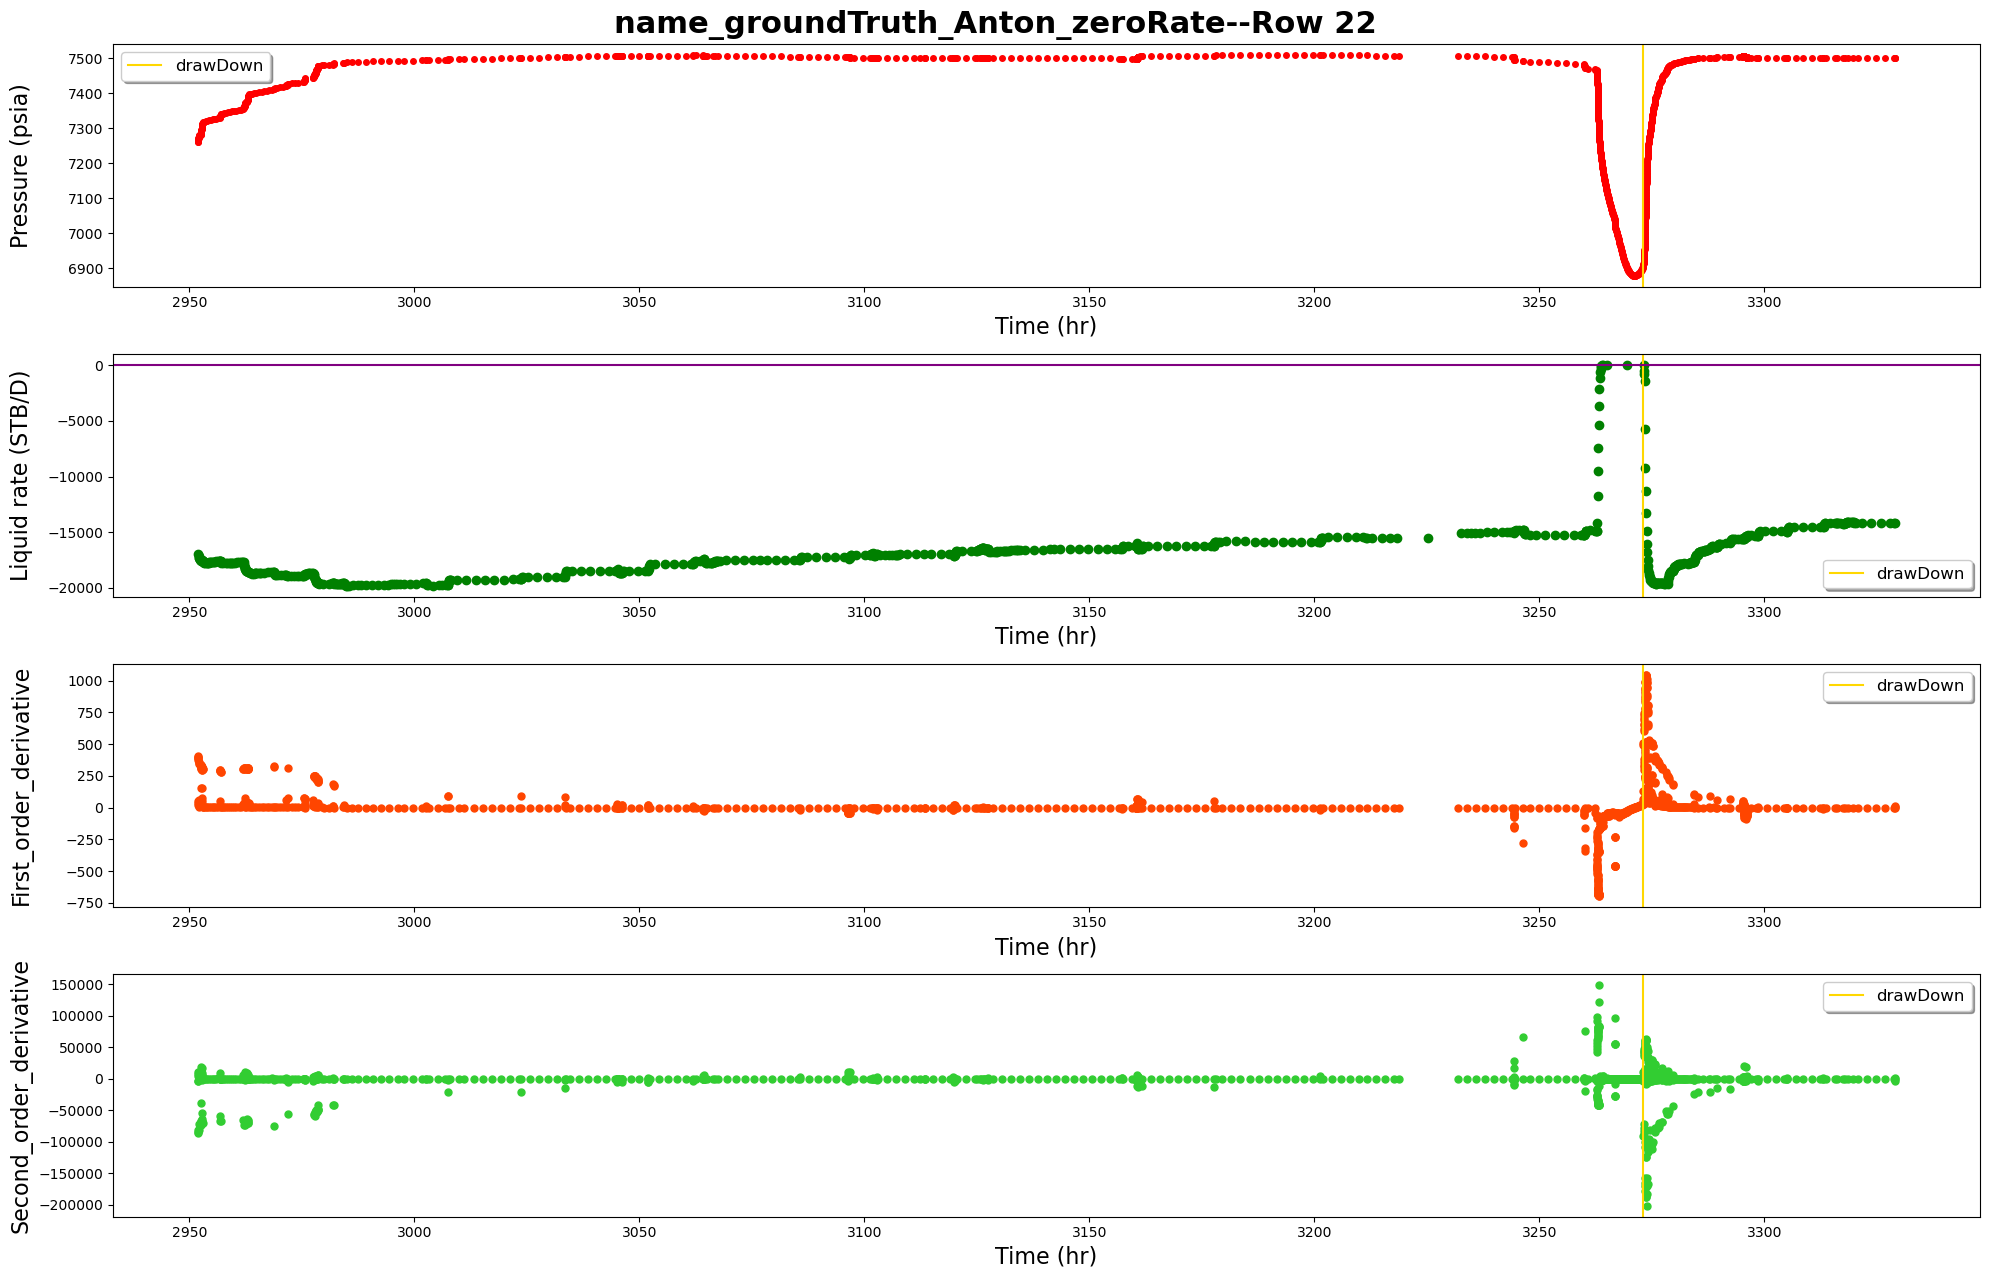

------row 23-----detected points:[27321]


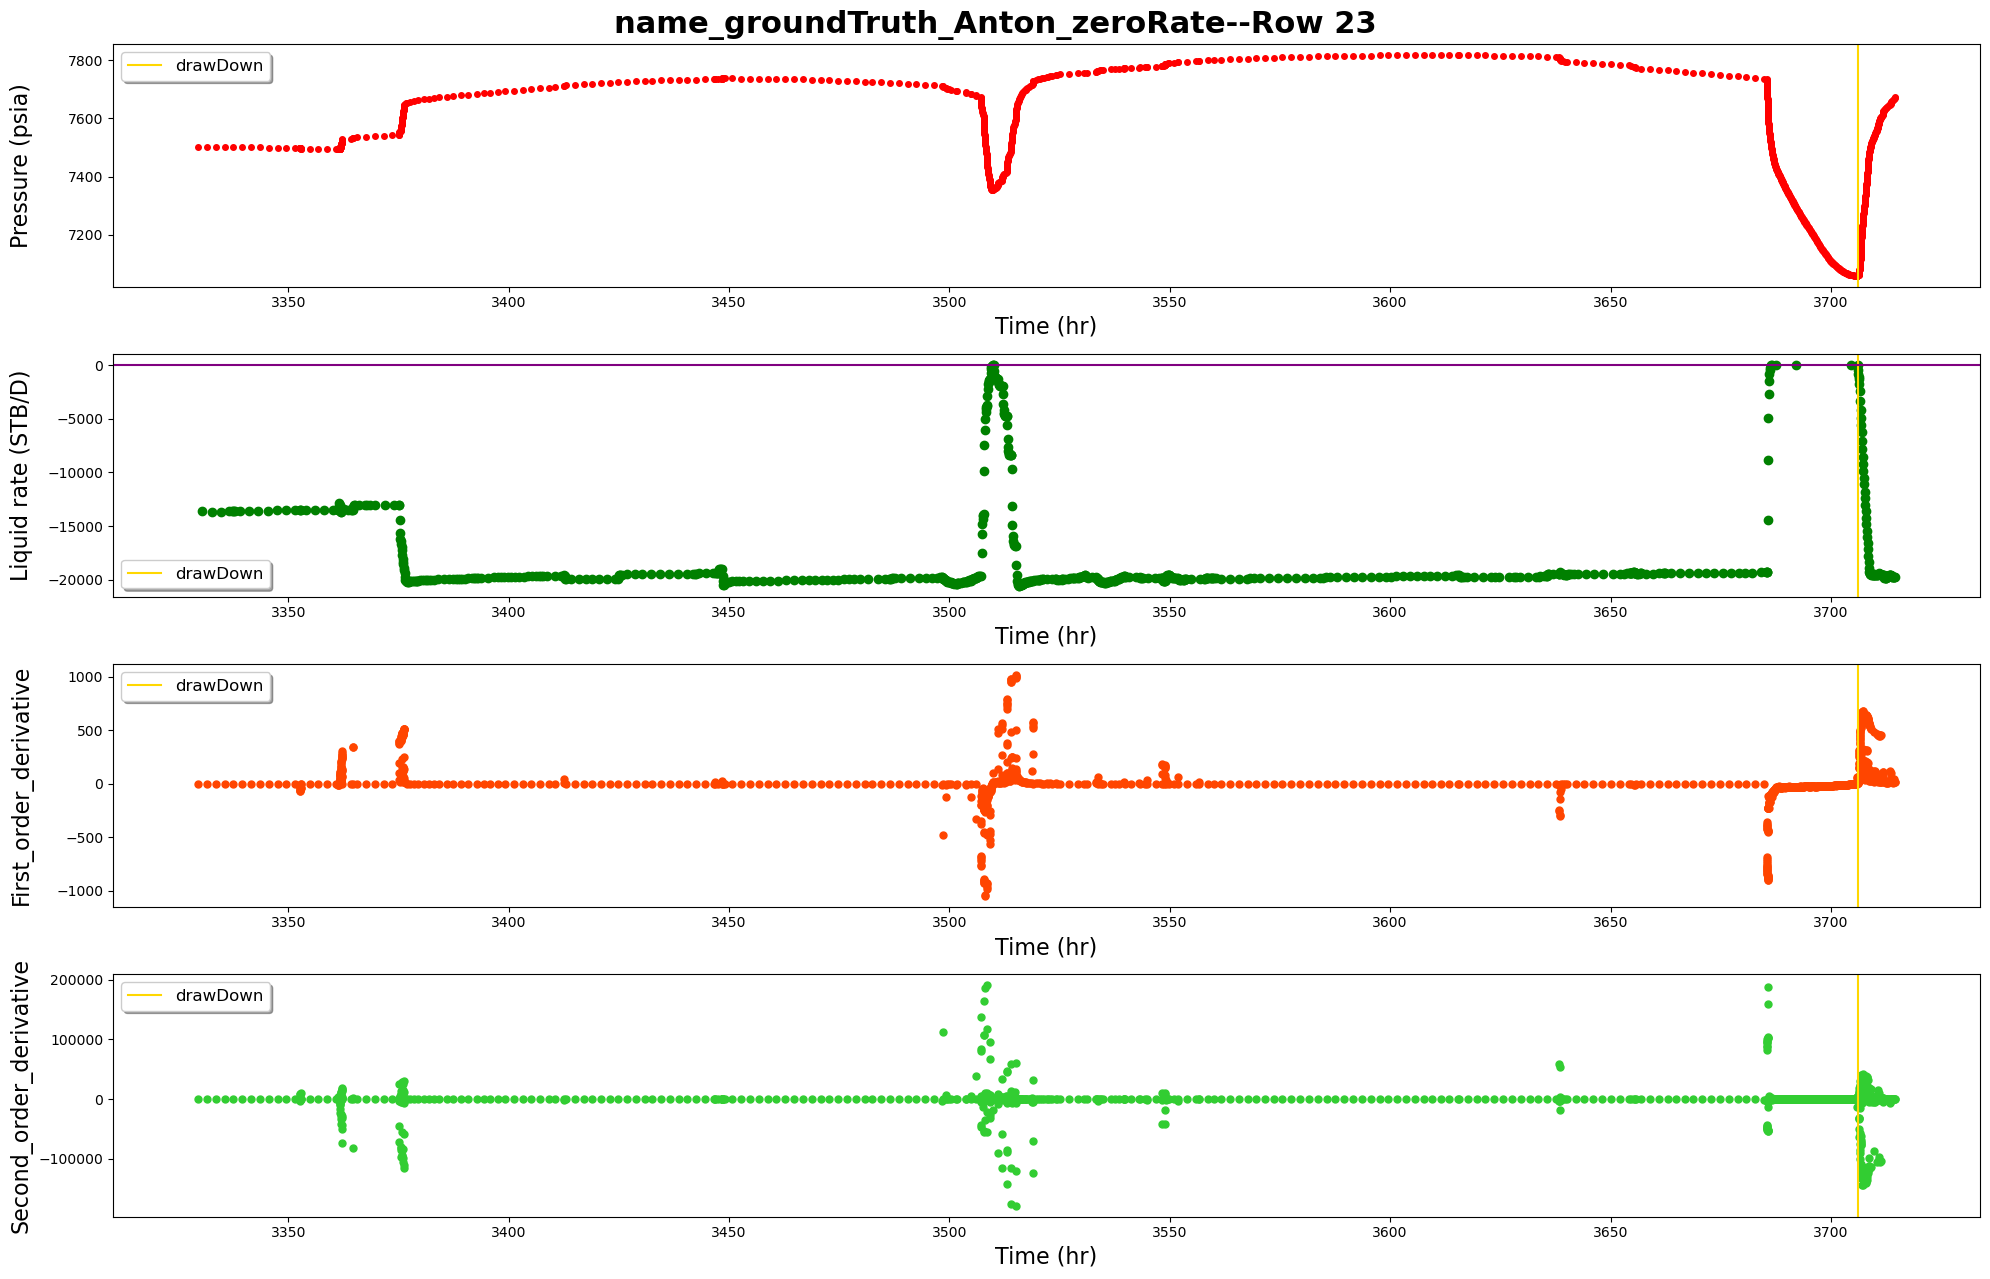

------row 24-----detected points:[27968, 28491]


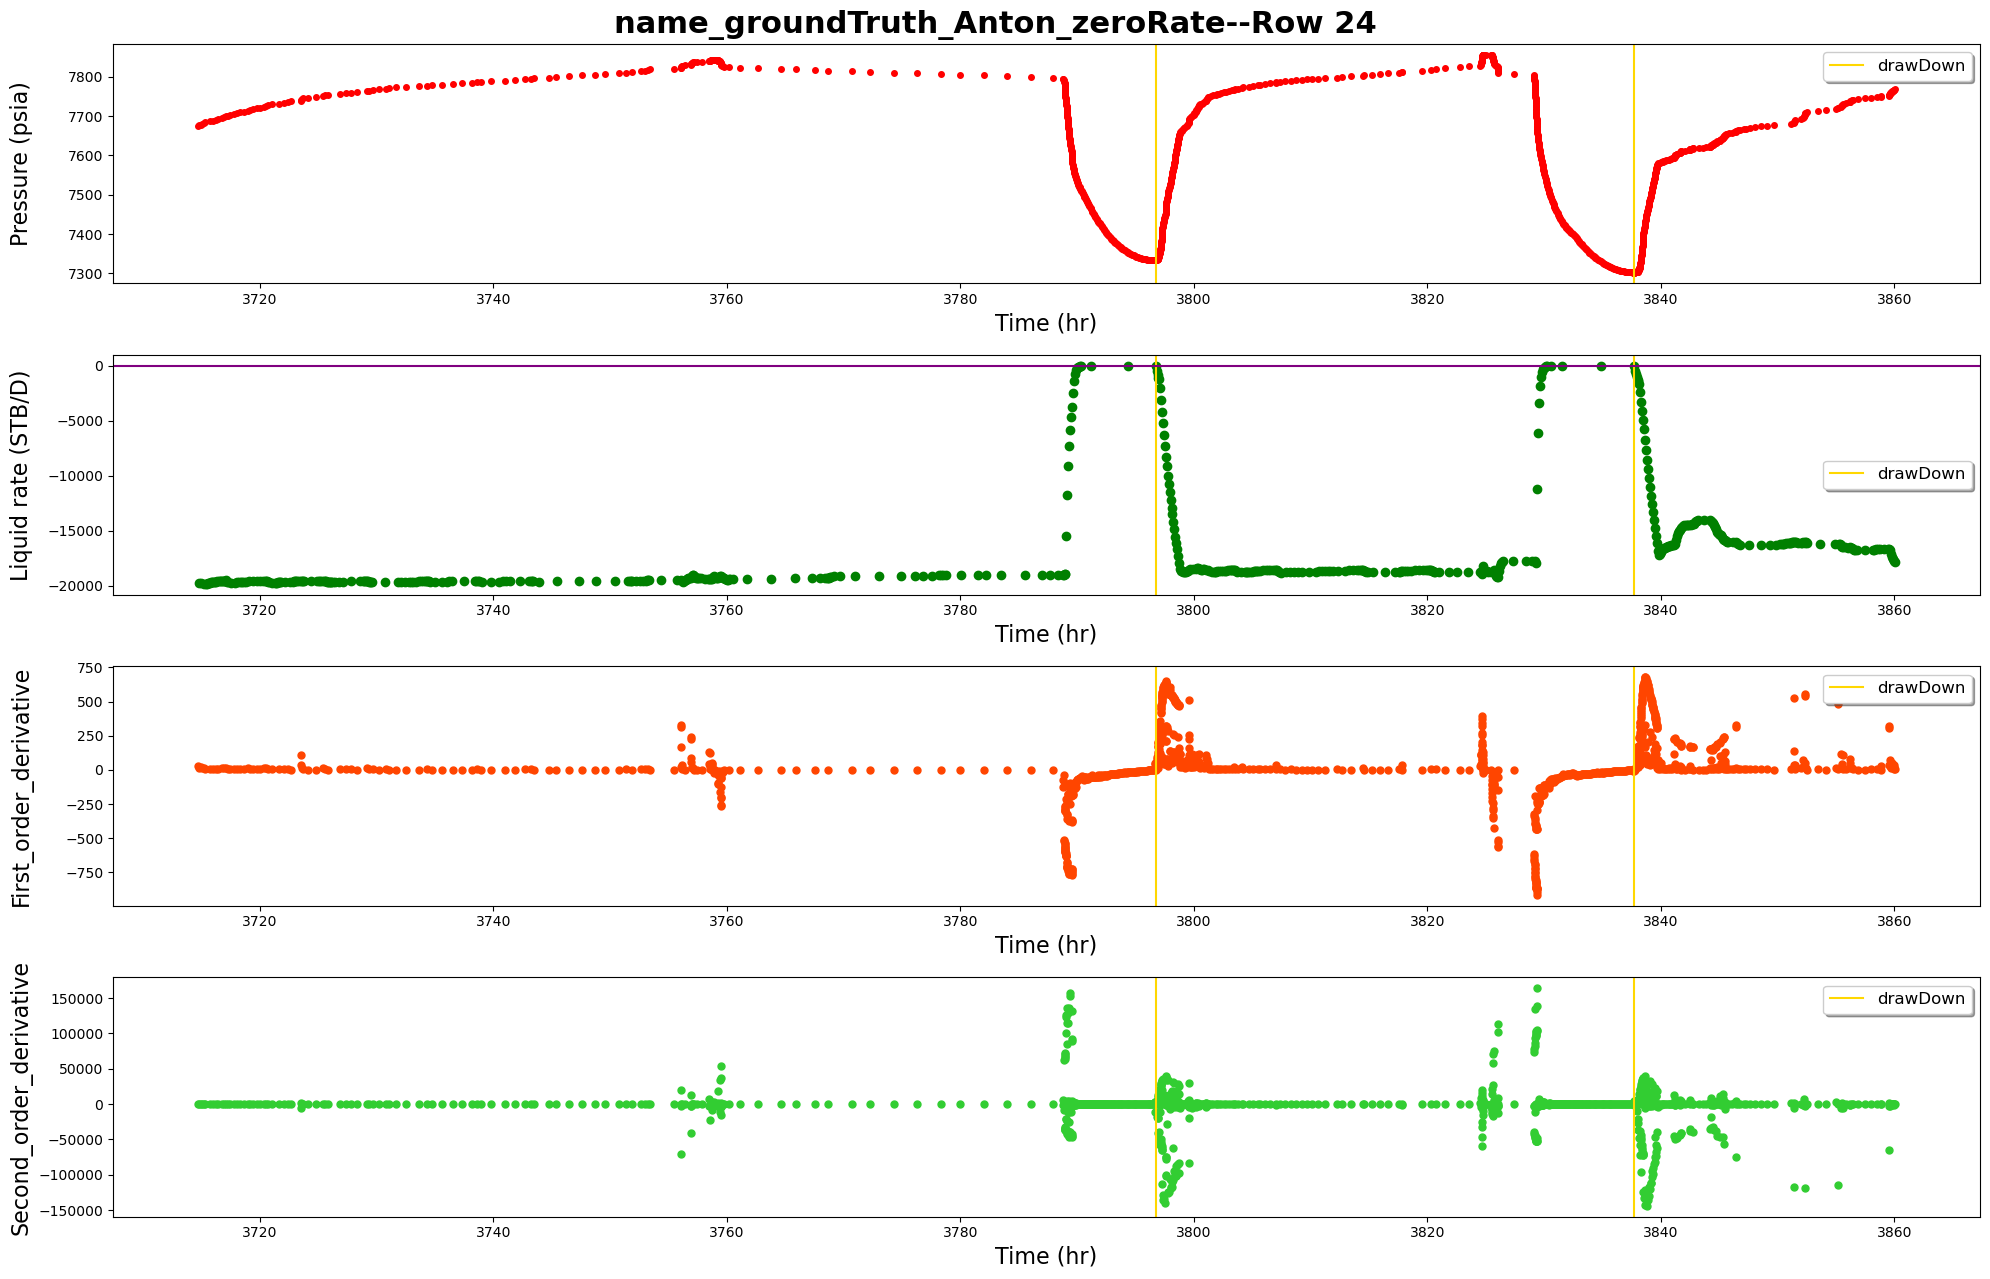

------row 25-----detected points:[29117, 29812, 29812, 29812, 29812, 29812, 29812, 29812, 29812, 29812, 29812, 29812, 29812]


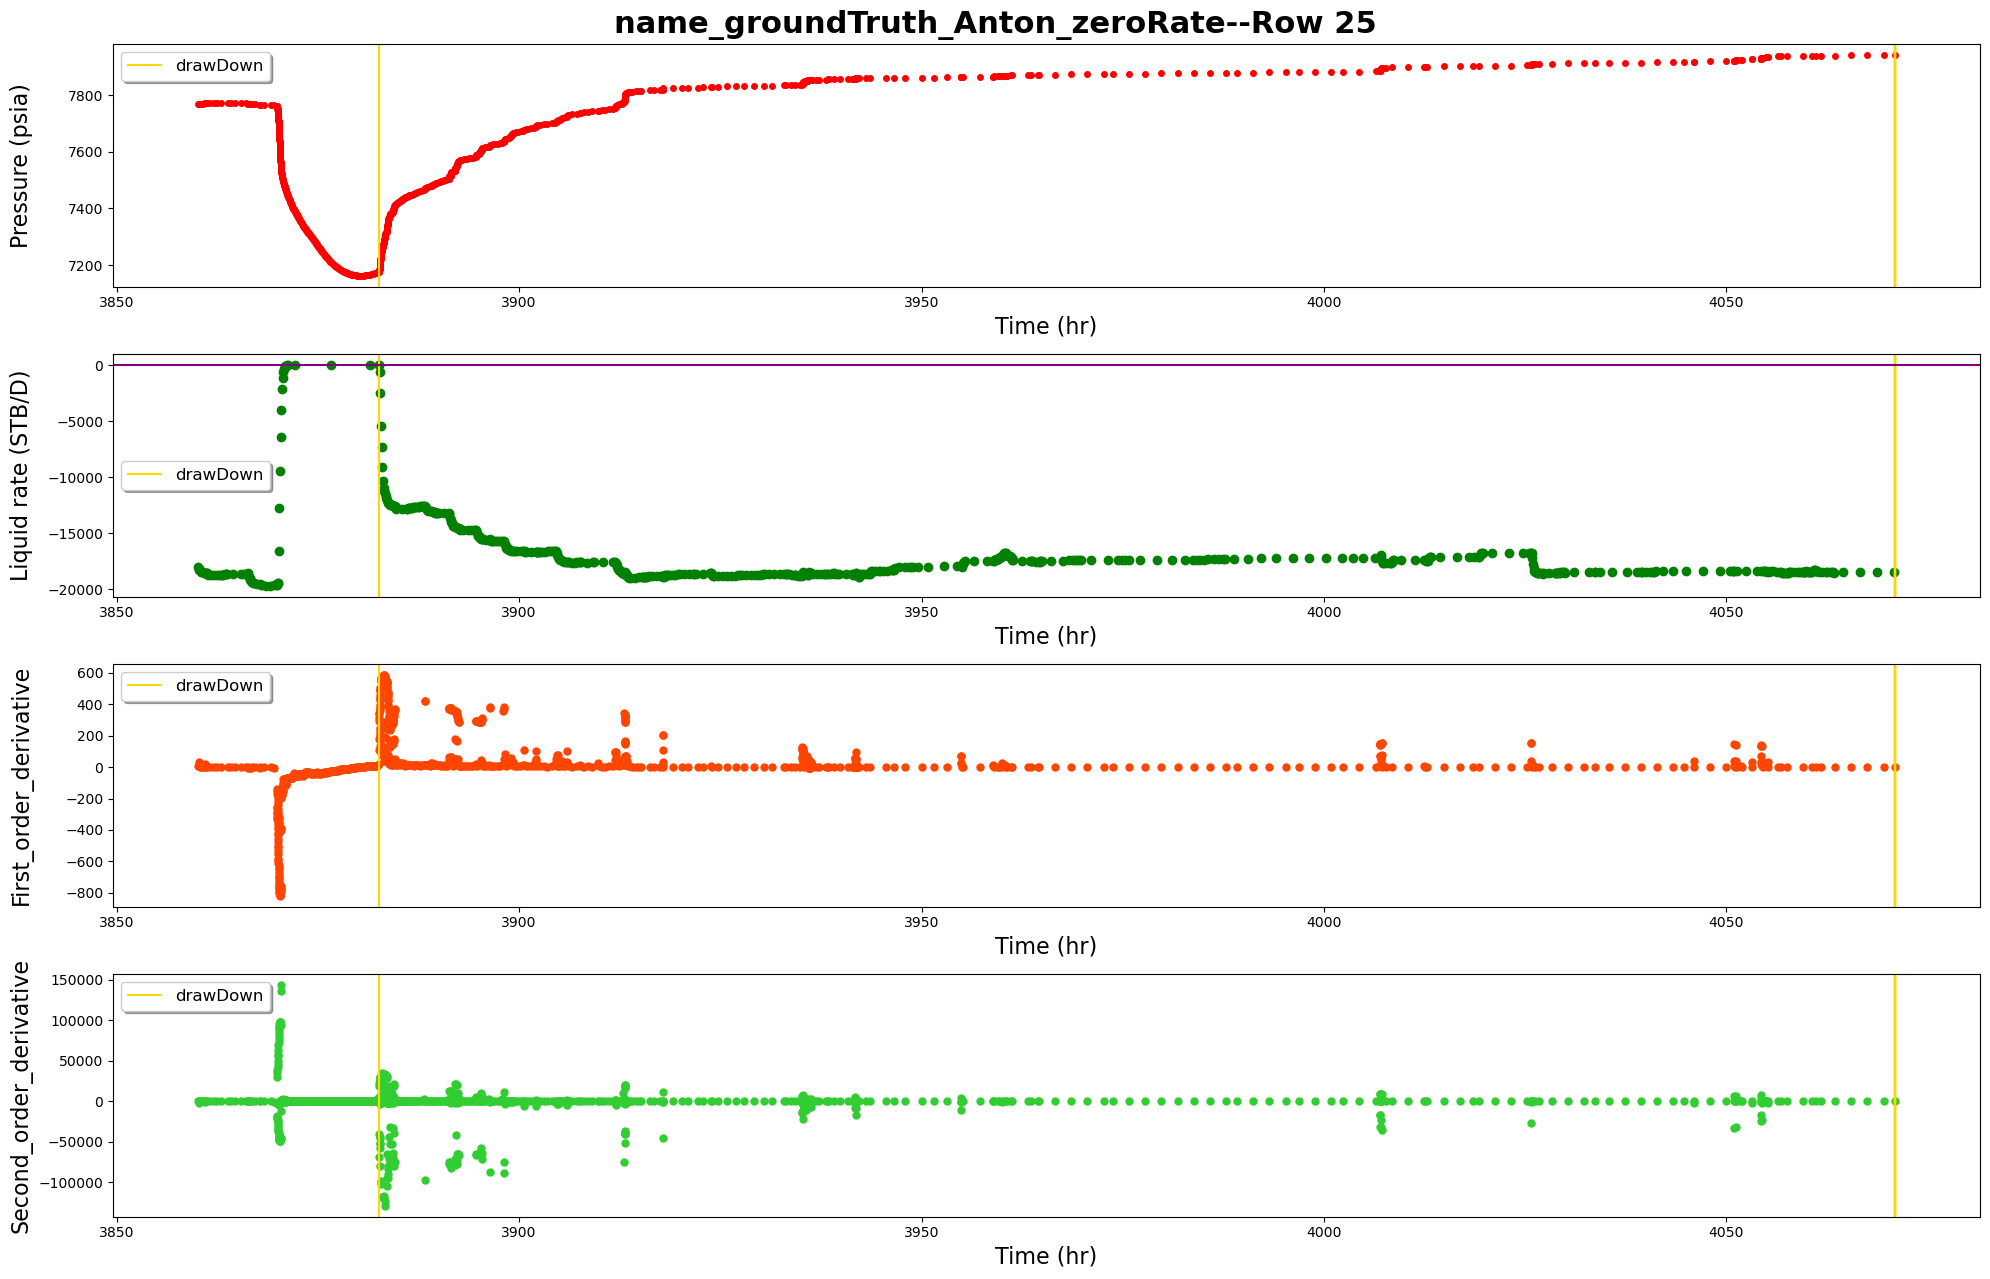

In [36]:
# txt=""
# parameters={"name":"groundTruth_Anton"
#             }
# detect_points_dict={"buildUp":buildUp_groundTruth,
#                    "drawDown":drawDown_groundTruth}

parameters={"name":"groundTruth_Anton_zeroRate"
            }
detect_points_dict={"buildUp":[],
                   "drawDown":breakPoints_zeroRate}
buildup=detect_points_dict["buildUp"]
drawdown=detect_points_dict["drawDown"]
txt=f"buildup:{len(buildup)}, drawdown:{len(drawdown)}"
pprint(txt)
plot_whole=True
plot_details=True
plot_statistics=False
folder_name=f"ground_Truth_Anton"
# folder_name="removed_transients"
%run plot_N_save.ipynb